# 3. Data Storytelling: Books

https://towardsdatascience.com/product-recommender-using-amazon-review-dataset-e69d479d81dd

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns

## 3.1 Data Cleaning

In [255]:
#loop through index and append each dataframe chunks to a list of dataframe
file_path = 'data/re_b{}.csv'
mini_df_holder =[]

for i in range(1,15):
    mini_df_holder.append(pd.read_csv(file_path.format(i)))

#concatenate all imported dataframe chunks
df_re = pd.concat(mini_df_holder,ignore_index=True)
del mini_df_holder

In [ ]:
df_pr = pd.read_csv('data/pr_books.csv')

**We will start by concatenating the previous chunks of Books review data into a single dataframe: df_re** <br>

The dataset still needs to be trimmed and this will be done throughout this section.<br>For example, there are reviews without a reviewerID. <br> Reviews without a reviewer will hinder the project during identifying item-reviewer frequency.

**Minimum Reviews per Product: 50 <br>
Minimum Reviews per Reviewer increased to approximately around 30**

We will first start by duplicate check now that we have the entire dataset ready.

### 3.1.1 Drop Duplicates

In [257]:
#to help run the drop_duplicate method, trim down reviews with 'unknown' reviewer.
#remove unknown reviews
df_re = df_re.loc[df_re.reviewerID!='unknown']

In [259]:
df_re.drop_duplicates(keep='first', inplace=True)

### 3.1.2 Combine Multiple Reviews by Same Reviewer

Row duplicates have been dealt with by using drop_duplicates : this would remove any exact same reviews.<br>
Another type of duplicates that requires processing are reviews written to a sinlge product multiple times by the same reviewer. <br> These records still exists in our dataset and needs to be combined to one.

In [400]:
df_re.shape

(6074064, 5)

In [428]:
#derive the user-review pairs
user_review_pair = df_re[['asin','reviewerID']]

#from user value pairs, find the duplicating pairs
user_review_dups = user_review_pair.loc[user_review_pair.duplicated(keep=False)] 

#append the two columns to create a unique identifier for each user-review pair
user_review_dups_id = user_review_dups['asin']+user_review_dups['reviewerID']
user_review_dups_id = user_review_dups_id.unique()

#create a user_review_id column that also appends the two columns
df_re['user_review_id'] = df_re['asin']+df_re['reviewerID']


Checking the duplicated item-review pair, it looks like there are some reviews that contain different ratings and reviews, and some reviews with seemingly same ratings and reviews. <br> At this time, it is difficult for us to identify the similarities between each of the user-review duplicates so we will combine each user-review duplicates into one row.

In [446]:
"""
Takes in original dataframe and list of unique user-review duplicate

Outputs a modified dataframe with each user-review duplicates merged into single rows

"""

def mergeRows(df,ur_list):
    
   # i=0
   # j=len(ur_list)
    
    #list of df holder
    new_find_id=[]
    
    #for each user-review duplicate id
    for ur_id in ur_list:
        
        #extract df slice containing current ur_id then remove it from original df
        find_id = df.loc[df.user_review_id == ur_id]
        
        #create a new single row df that combines the current user-review duplicates 
        new_find_id.append(pd.DataFrame({'asin':find_id.asin.unique(), 'title':find_id.title.unique(),
                                    'reviewerID':find_id.reviewerID.unique(), 'overall':find_id.overall.mean(),
                                    'review':find_id.review.sum(),
                                    'user_review_id':find_id.user_review_id.unique()})) 
    
    return pd.concat(new_find_id)
        

In [438]:
#divide the orginal dataframe into two: duplicates and non-duplicates
merge_half = df_re.loc[df_re.user_review_id.isin(user_review_dups_id)]
other_half = df_re.loc[~df_re.user_review_id.isin(user_review_dups_id)]

In [441]:
#duplicates merge to a single 
merged = mergeRows(merge_half,user_review_dups_id)

0  of  56171
1  of  56171
2  of  56171
3  of  56171
4  of  56171
5  of  56171
6  of  56171
7  of  56171
8  of  56171
9  of  56171
10  of  56171
11  of  56171
12  of  56171
13  of  56171
14  of  56171
15  of  56171
16  of  56171
17  of  56171
18  of  56171
19  of  56171
20  of  56171
21  of  56171
22  of  56171
23  of  56171
24  of  56171
25  of  56171
26  of  56171
27  of  56171
28  of  56171
29  of  56171
30  of  56171
31  of  56171
32  of  56171
33  of  56171
34  of  56171
35  of  56171
36  of  56171
37  of  56171
38  of  56171
39  of  56171
40  of  56171
41  of  56171
42  of  56171
43  of  56171
44  of  56171
45  of  56171
46  of  56171
47  of  56171
48  of  56171
49  of  56171
50  of  56171
51  of  56171
52  of  56171
53  of  56171
54  of  56171
55  of  56171
56  of  56171
57  of  56171
58  of  56171
59  of  56171
60  of  56171
61  of  56171
62  of  56171
63  of  56171
64  of  56171
65  of  56171
66  of  56171
67  of  56171
68  of  56171
69  of  56171
70  of  56171
71  of  56171
72

557  of  56171
558  of  56171
559  of  56171
560  of  56171
561  of  56171
562  of  56171
563  of  56171
564  of  56171
565  of  56171
566  of  56171
567  of  56171
568  of  56171
569  of  56171
570  of  56171
571  of  56171
572  of  56171
573  of  56171
574  of  56171
575  of  56171
576  of  56171
577  of  56171
578  of  56171
579  of  56171
580  of  56171
581  of  56171
582  of  56171
583  of  56171
584  of  56171
585  of  56171
586  of  56171
587  of  56171
588  of  56171
589  of  56171
590  of  56171
591  of  56171
592  of  56171
593  of  56171
594  of  56171
595  of  56171
596  of  56171
597  of  56171
598  of  56171
599  of  56171
600  of  56171
601  of  56171
602  of  56171
603  of  56171
604  of  56171
605  of  56171
606  of  56171
607  of  56171
608  of  56171
609  of  56171
610  of  56171
611  of  56171
612  of  56171
613  of  56171
614  of  56171
615  of  56171
616  of  56171
617  of  56171
618  of  56171
619  of  56171
620  of  56171
621  of  56171
622  of  56171
623  of  5

1107  of  56171
1108  of  56171
1109  of  56171
1110  of  56171
1111  of  56171
1112  of  56171
1113  of  56171
1114  of  56171
1115  of  56171
1116  of  56171
1117  of  56171
1118  of  56171
1119  of  56171
1120  of  56171
1121  of  56171
1122  of  56171
1123  of  56171
1124  of  56171
1125  of  56171
1126  of  56171
1127  of  56171
1128  of  56171
1129  of  56171
1130  of  56171
1131  of  56171
1132  of  56171
1133  of  56171
1134  of  56171
1135  of  56171
1136  of  56171
1137  of  56171
1138  of  56171
1139  of  56171
1140  of  56171
1141  of  56171
1142  of  56171
1143  of  56171
1144  of  56171
1145  of  56171
1146  of  56171
1147  of  56171
1148  of  56171
1149  of  56171
1150  of  56171
1151  of  56171
1152  of  56171
1153  of  56171
1154  of  56171
1155  of  56171
1156  of  56171
1157  of  56171
1158  of  56171
1159  of  56171
1160  of  56171
1161  of  56171
1162  of  56171
1163  of  56171
1164  of  56171
1165  of  56171
1166  of  56171
1167  of  56171
1168  of  56171
1169  of

1628  of  56171
1629  of  56171
1630  of  56171
1631  of  56171
1632  of  56171
1633  of  56171
1634  of  56171
1635  of  56171
1636  of  56171
1637  of  56171
1638  of  56171
1639  of  56171
1640  of  56171
1641  of  56171
1642  of  56171
1643  of  56171
1644  of  56171
1645  of  56171
1646  of  56171
1647  of  56171
1648  of  56171
1649  of  56171
1650  of  56171
1651  of  56171
1652  of  56171
1653  of  56171
1654  of  56171
1655  of  56171
1656  of  56171
1657  of  56171
1658  of  56171
1659  of  56171
1660  of  56171
1661  of  56171
1662  of  56171
1663  of  56171
1664  of  56171
1665  of  56171
1666  of  56171
1667  of  56171
1668  of  56171
1669  of  56171
1670  of  56171
1671  of  56171
1672  of  56171
1673  of  56171
1674  of  56171
1675  of  56171
1676  of  56171
1677  of  56171
1678  of  56171
1679  of  56171
1680  of  56171
1681  of  56171
1682  of  56171
1683  of  56171
1684  of  56171
1685  of  56171
1686  of  56171
1687  of  56171
1688  of  56171
1689  of  56171
1690  of

2143  of  56171
2144  of  56171
2145  of  56171
2146  of  56171
2147  of  56171
2148  of  56171
2149  of  56171
2150  of  56171
2151  of  56171
2152  of  56171
2153  of  56171
2154  of  56171
2155  of  56171
2156  of  56171
2157  of  56171
2158  of  56171
2159  of  56171
2160  of  56171
2161  of  56171
2162  of  56171
2163  of  56171
2164  of  56171
2165  of  56171
2166  of  56171
2167  of  56171
2168  of  56171
2169  of  56171
2170  of  56171
2171  of  56171
2172  of  56171
2173  of  56171
2174  of  56171
2175  of  56171
2176  of  56171
2177  of  56171
2178  of  56171
2179  of  56171
2180  of  56171
2181  of  56171
2182  of  56171
2183  of  56171
2184  of  56171
2185  of  56171
2186  of  56171
2187  of  56171
2188  of  56171
2189  of  56171
2190  of  56171
2191  of  56171
2192  of  56171
2193  of  56171
2194  of  56171
2195  of  56171
2196  of  56171
2197  of  56171
2198  of  56171
2199  of  56171
2200  of  56171
2201  of  56171
2202  of  56171
2203  of  56171
2204  of  56171
2205  of

2660  of  56171
2661  of  56171
2662  of  56171
2663  of  56171
2664  of  56171
2665  of  56171
2666  of  56171
2667  of  56171
2668  of  56171
2669  of  56171
2670  of  56171
2671  of  56171
2672  of  56171
2673  of  56171
2674  of  56171
2675  of  56171
2676  of  56171
2677  of  56171
2678  of  56171
2679  of  56171
2680  of  56171
2681  of  56171
2682  of  56171
2683  of  56171
2684  of  56171
2685  of  56171
2686  of  56171
2687  of  56171
2688  of  56171
2689  of  56171
2690  of  56171
2691  of  56171
2692  of  56171
2693  of  56171
2694  of  56171
2695  of  56171
2696  of  56171
2697  of  56171
2698  of  56171
2699  of  56171
2700  of  56171
2701  of  56171
2702  of  56171
2703  of  56171
2704  of  56171
2705  of  56171
2706  of  56171
2707  of  56171
2708  of  56171
2709  of  56171
2710  of  56171
2711  of  56171
2712  of  56171
2713  of  56171
2714  of  56171
2715  of  56171
2716  of  56171
2717  of  56171
2718  of  56171
2719  of  56171
2720  of  56171
2721  of  56171
2722  of

3178  of  56171
3179  of  56171
3180  of  56171
3181  of  56171
3182  of  56171
3183  of  56171
3184  of  56171
3185  of  56171
3186  of  56171
3187  of  56171
3188  of  56171
3189  of  56171
3190  of  56171
3191  of  56171
3192  of  56171
3193  of  56171
3194  of  56171
3195  of  56171
3196  of  56171
3197  of  56171
3198  of  56171
3199  of  56171
3200  of  56171
3201  of  56171
3202  of  56171
3203  of  56171
3204  of  56171
3205  of  56171
3206  of  56171
3207  of  56171
3208  of  56171
3209  of  56171
3210  of  56171
3211  of  56171
3212  of  56171
3213  of  56171
3214  of  56171
3215  of  56171
3216  of  56171
3217  of  56171
3218  of  56171
3219  of  56171
3220  of  56171
3221  of  56171
3222  of  56171
3223  of  56171
3224  of  56171
3225  of  56171
3226  of  56171
3227  of  56171
3228  of  56171
3229  of  56171
3230  of  56171
3231  of  56171
3232  of  56171
3233  of  56171
3234  of  56171
3235  of  56171
3236  of  56171
3237  of  56171
3238  of  56171
3239  of  56171
3240  of

3699  of  56171
3700  of  56171
3701  of  56171
3702  of  56171
3703  of  56171
3704  of  56171
3705  of  56171
3706  of  56171
3707  of  56171
3708  of  56171
3709  of  56171
3710  of  56171
3711  of  56171
3712  of  56171
3713  of  56171
3714  of  56171
3715  of  56171
3716  of  56171
3717  of  56171
3718  of  56171
3719  of  56171
3720  of  56171
3721  of  56171
3722  of  56171
3723  of  56171
3724  of  56171
3725  of  56171
3726  of  56171
3727  of  56171
3728  of  56171
3729  of  56171
3730  of  56171
3731  of  56171
3732  of  56171
3733  of  56171
3734  of  56171
3735  of  56171
3736  of  56171
3737  of  56171
3738  of  56171
3739  of  56171
3740  of  56171
3741  of  56171
3742  of  56171
3743  of  56171
3744  of  56171
3745  of  56171
3746  of  56171
3747  of  56171
3748  of  56171
3749  of  56171
3750  of  56171
3751  of  56171
3752  of  56171
3753  of  56171
3754  of  56171
3755  of  56171
3756  of  56171
3757  of  56171
3758  of  56171
3759  of  56171
3760  of  56171
3761  of

4218  of  56171
4219  of  56171
4220  of  56171
4221  of  56171
4222  of  56171
4223  of  56171
4224  of  56171
4225  of  56171
4226  of  56171
4227  of  56171
4228  of  56171
4229  of  56171
4230  of  56171
4231  of  56171
4232  of  56171
4233  of  56171
4234  of  56171
4235  of  56171
4236  of  56171
4237  of  56171
4238  of  56171
4239  of  56171
4240  of  56171
4241  of  56171
4242  of  56171
4243  of  56171
4244  of  56171
4245  of  56171
4246  of  56171
4247  of  56171
4248  of  56171
4249  of  56171
4250  of  56171
4251  of  56171
4252  of  56171
4253  of  56171
4254  of  56171
4255  of  56171
4256  of  56171
4257  of  56171
4258  of  56171
4259  of  56171
4260  of  56171
4261  of  56171
4262  of  56171
4263  of  56171
4264  of  56171
4265  of  56171
4266  of  56171
4267  of  56171
4268  of  56171
4269  of  56171
4270  of  56171
4271  of  56171
4272  of  56171
4273  of  56171
4274  of  56171
4275  of  56171
4276  of  56171
4277  of  56171
4278  of  56171
4279  of  56171
4280  of

4736  of  56171
4737  of  56171
4738  of  56171
4739  of  56171
4740  of  56171
4741  of  56171
4742  of  56171
4743  of  56171
4744  of  56171
4745  of  56171
4746  of  56171
4747  of  56171
4748  of  56171
4749  of  56171
4750  of  56171
4751  of  56171
4752  of  56171
4753  of  56171
4754  of  56171
4755  of  56171
4756  of  56171
4757  of  56171
4758  of  56171
4759  of  56171
4760  of  56171
4761  of  56171
4762  of  56171
4763  of  56171
4764  of  56171
4765  of  56171
4766  of  56171
4767  of  56171
4768  of  56171
4769  of  56171
4770  of  56171
4771  of  56171
4772  of  56171
4773  of  56171
4774  of  56171
4775  of  56171
4776  of  56171
4777  of  56171
4778  of  56171
4779  of  56171
4780  of  56171
4781  of  56171
4782  of  56171
4783  of  56171
4784  of  56171
4785  of  56171
4786  of  56171
4787  of  56171
4788  of  56171
4789  of  56171
4790  of  56171
4791  of  56171
4792  of  56171
4793  of  56171
4794  of  56171
4795  of  56171
4796  of  56171
4797  of  56171
4798  of

5259  of  56171
5260  of  56171
5261  of  56171
5262  of  56171
5263  of  56171
5264  of  56171
5265  of  56171
5266  of  56171
5267  of  56171
5268  of  56171
5269  of  56171
5270  of  56171
5271  of  56171
5272  of  56171
5273  of  56171
5274  of  56171
5275  of  56171
5276  of  56171
5277  of  56171
5278  of  56171
5279  of  56171
5280  of  56171
5281  of  56171
5282  of  56171
5283  of  56171
5284  of  56171
5285  of  56171
5286  of  56171
5287  of  56171
5288  of  56171
5289  of  56171
5290  of  56171
5291  of  56171
5292  of  56171
5293  of  56171
5294  of  56171
5295  of  56171
5296  of  56171
5297  of  56171
5298  of  56171
5299  of  56171
5300  of  56171
5301  of  56171
5302  of  56171
5303  of  56171
5304  of  56171
5305  of  56171
5306  of  56171
5307  of  56171
5308  of  56171
5309  of  56171
5310  of  56171
5311  of  56171
5312  of  56171
5313  of  56171
5314  of  56171
5315  of  56171
5316  of  56171
5317  of  56171
5318  of  56171
5319  of  56171
5320  of  56171
5321  of

5776  of  56171
5777  of  56171
5778  of  56171
5779  of  56171
5780  of  56171
5781  of  56171
5782  of  56171
5783  of  56171
5784  of  56171
5785  of  56171
5786  of  56171
5787  of  56171
5788  of  56171
5789  of  56171
5790  of  56171
5791  of  56171
5792  of  56171
5793  of  56171
5794  of  56171
5795  of  56171
5796  of  56171
5797  of  56171
5798  of  56171
5799  of  56171
5800  of  56171
5801  of  56171
5802  of  56171
5803  of  56171
5804  of  56171
5805  of  56171
5806  of  56171
5807  of  56171
5808  of  56171
5809  of  56171
5810  of  56171
5811  of  56171
5812  of  56171
5813  of  56171
5814  of  56171
5815  of  56171
5816  of  56171
5817  of  56171
5818  of  56171
5819  of  56171
5820  of  56171
5821  of  56171
5822  of  56171
5823  of  56171
5824  of  56171
5825  of  56171
5826  of  56171
5827  of  56171
5828  of  56171
5829  of  56171
5830  of  56171
5831  of  56171
5832  of  56171
5833  of  56171
5834  of  56171
5835  of  56171
5836  of  56171
5837  of  56171
5838  of

6297  of  56171
6298  of  56171
6299  of  56171
6300  of  56171
6301  of  56171
6302  of  56171
6303  of  56171
6304  of  56171
6305  of  56171
6306  of  56171
6307  of  56171
6308  of  56171
6309  of  56171
6310  of  56171
6311  of  56171
6312  of  56171
6313  of  56171
6314  of  56171
6315  of  56171
6316  of  56171
6317  of  56171
6318  of  56171
6319  of  56171
6320  of  56171
6321  of  56171
6322  of  56171
6323  of  56171
6324  of  56171
6325  of  56171
6326  of  56171
6327  of  56171
6328  of  56171
6329  of  56171
6330  of  56171
6331  of  56171
6332  of  56171
6333  of  56171
6334  of  56171
6335  of  56171
6336  of  56171
6337  of  56171
6338  of  56171
6339  of  56171
6340  of  56171
6341  of  56171
6342  of  56171
6343  of  56171
6344  of  56171
6345  of  56171
6346  of  56171
6347  of  56171
6348  of  56171
6349  of  56171
6350  of  56171
6351  of  56171
6352  of  56171
6353  of  56171
6354  of  56171
6355  of  56171
6356  of  56171
6357  of  56171
6358  of  56171
6359  of

6817  of  56171
6818  of  56171
6819  of  56171
6820  of  56171
6821  of  56171
6822  of  56171
6823  of  56171
6824  of  56171
6825  of  56171
6826  of  56171
6827  of  56171
6828  of  56171
6829  of  56171
6830  of  56171
6831  of  56171
6832  of  56171
6833  of  56171
6834  of  56171
6835  of  56171
6836  of  56171
6837  of  56171
6838  of  56171
6839  of  56171
6840  of  56171
6841  of  56171
6842  of  56171
6843  of  56171
6844  of  56171
6845  of  56171
6846  of  56171
6847  of  56171
6848  of  56171
6849  of  56171
6850  of  56171
6851  of  56171
6852  of  56171
6853  of  56171
6854  of  56171
6855  of  56171
6856  of  56171
6857  of  56171
6858  of  56171
6859  of  56171
6860  of  56171
6861  of  56171
6862  of  56171
6863  of  56171
6864  of  56171
6865  of  56171
6866  of  56171
6867  of  56171
6868  of  56171
6869  of  56171
6870  of  56171
6871  of  56171
6872  of  56171
6873  of  56171
6874  of  56171
6875  of  56171
6876  of  56171
6877  of  56171
6878  of  56171
6879  of

7335  of  56171
7336  of  56171
7337  of  56171
7338  of  56171
7339  of  56171
7340  of  56171
7341  of  56171
7342  of  56171
7343  of  56171
7344  of  56171
7345  of  56171
7346  of  56171
7347  of  56171
7348  of  56171
7349  of  56171
7350  of  56171
7351  of  56171
7352  of  56171
7353  of  56171
7354  of  56171
7355  of  56171
7356  of  56171
7357  of  56171
7358  of  56171
7359  of  56171
7360  of  56171
7361  of  56171
7362  of  56171
7363  of  56171
7364  of  56171
7365  of  56171
7366  of  56171
7367  of  56171
7368  of  56171
7369  of  56171
7370  of  56171
7371  of  56171
7372  of  56171
7373  of  56171
7374  of  56171
7375  of  56171
7376  of  56171
7377  of  56171
7378  of  56171
7379  of  56171
7380  of  56171
7381  of  56171
7382  of  56171
7383  of  56171
7384  of  56171
7385  of  56171
7386  of  56171
7387  of  56171
7388  of  56171
7389  of  56171
7390  of  56171
7391  of  56171
7392  of  56171
7393  of  56171
7394  of  56171
7395  of  56171
7396  of  56171
7397  of

7854  of  56171
7855  of  56171
7856  of  56171
7857  of  56171
7858  of  56171
7859  of  56171
7860  of  56171
7861  of  56171
7862  of  56171
7863  of  56171
7864  of  56171
7865  of  56171
7866  of  56171
7867  of  56171
7868  of  56171
7869  of  56171
7870  of  56171
7871  of  56171
7872  of  56171
7873  of  56171
7874  of  56171
7875  of  56171
7876  of  56171
7877  of  56171
7878  of  56171
7879  of  56171
7880  of  56171
7881  of  56171
7882  of  56171
7883  of  56171
7884  of  56171
7885  of  56171
7886  of  56171
7887  of  56171
7888  of  56171
7889  of  56171
7890  of  56171
7891  of  56171
7892  of  56171
7893  of  56171
7894  of  56171
7895  of  56171
7896  of  56171
7897  of  56171
7898  of  56171
7899  of  56171
7900  of  56171
7901  of  56171
7902  of  56171
7903  of  56171
7904  of  56171
7905  of  56171
7906  of  56171
7907  of  56171
7908  of  56171
7909  of  56171
7910  of  56171
7911  of  56171
7912  of  56171
7913  of  56171
7914  of  56171
7915  of  56171
7916  of

8370  of  56171
8371  of  56171
8372  of  56171
8373  of  56171
8374  of  56171
8375  of  56171
8376  of  56171
8377  of  56171
8378  of  56171
8379  of  56171
8380  of  56171
8381  of  56171
8382  of  56171
8383  of  56171
8384  of  56171
8385  of  56171
8386  of  56171
8387  of  56171
8388  of  56171
8389  of  56171
8390  of  56171
8391  of  56171
8392  of  56171
8393  of  56171
8394  of  56171
8395  of  56171
8396  of  56171
8397  of  56171
8398  of  56171
8399  of  56171
8400  of  56171
8401  of  56171
8402  of  56171
8403  of  56171
8404  of  56171
8405  of  56171
8406  of  56171
8407  of  56171
8408  of  56171
8409  of  56171
8410  of  56171
8411  of  56171
8412  of  56171
8413  of  56171
8414  of  56171
8415  of  56171
8416  of  56171
8417  of  56171
8418  of  56171
8419  of  56171
8420  of  56171
8421  of  56171
8422  of  56171
8423  of  56171
8424  of  56171
8425  of  56171
8426  of  56171
8427  of  56171
8428  of  56171
8429  of  56171
8430  of  56171
8431  of  56171
8432  of

8885  of  56171
8886  of  56171
8887  of  56171
8888  of  56171
8889  of  56171
8890  of  56171
8891  of  56171
8892  of  56171
8893  of  56171
8894  of  56171
8895  of  56171
8896  of  56171
8897  of  56171
8898  of  56171
8899  of  56171
8900  of  56171
8901  of  56171
8902  of  56171
8903  of  56171
8904  of  56171
8905  of  56171
8906  of  56171
8907  of  56171
8908  of  56171
8909  of  56171
8910  of  56171
8911  of  56171
8912  of  56171
8913  of  56171
8914  of  56171
8915  of  56171
8916  of  56171
8917  of  56171
8918  of  56171
8919  of  56171
8920  of  56171
8921  of  56171
8922  of  56171
8923  of  56171
8924  of  56171
8925  of  56171
8926  of  56171
8927  of  56171
8928  of  56171
8929  of  56171
8930  of  56171
8931  of  56171
8932  of  56171
8933  of  56171
8934  of  56171
8935  of  56171
8936  of  56171
8937  of  56171
8938  of  56171
8939  of  56171
8940  of  56171
8941  of  56171
8942  of  56171
8943  of  56171
8944  of  56171
8945  of  56171
8946  of  56171
8947  of

9407  of  56171
9408  of  56171
9409  of  56171
9410  of  56171
9411  of  56171
9412  of  56171
9413  of  56171
9414  of  56171
9415  of  56171
9416  of  56171
9417  of  56171
9418  of  56171
9419  of  56171
9420  of  56171
9421  of  56171
9422  of  56171
9423  of  56171
9424  of  56171
9425  of  56171
9426  of  56171
9427  of  56171
9428  of  56171
9429  of  56171
9430  of  56171
9431  of  56171
9432  of  56171
9433  of  56171
9434  of  56171
9435  of  56171
9436  of  56171
9437  of  56171
9438  of  56171
9439  of  56171
9440  of  56171
9441  of  56171
9442  of  56171
9443  of  56171
9444  of  56171
9445  of  56171
9446  of  56171
9447  of  56171
9448  of  56171
9449  of  56171
9450  of  56171
9451  of  56171
9452  of  56171
9453  of  56171
9454  of  56171
9455  of  56171
9456  of  56171
9457  of  56171
9458  of  56171
9459  of  56171
9460  of  56171
9461  of  56171
9462  of  56171
9463  of  56171
9464  of  56171
9465  of  56171
9466  of  56171
9467  of  56171
9468  of  56171
9469  of

9928  of  56171
9929  of  56171
9930  of  56171
9931  of  56171
9932  of  56171
9933  of  56171
9934  of  56171
9935  of  56171
9936  of  56171
9937  of  56171
9938  of  56171
9939  of  56171
9940  of  56171
9941  of  56171
9942  of  56171
9943  of  56171
9944  of  56171
9945  of  56171
9946  of  56171
9947  of  56171
9948  of  56171
9949  of  56171
9950  of  56171
9951  of  56171
9952  of  56171
9953  of  56171
9954  of  56171
9955  of  56171
9956  of  56171
9957  of  56171
9958  of  56171
9959  of  56171
9960  of  56171
9961  of  56171
9962  of  56171
9963  of  56171
9964  of  56171
9965  of  56171
9966  of  56171
9967  of  56171
9968  of  56171
9969  of  56171
9970  of  56171
9971  of  56171
9972  of  56171
9973  of  56171
9974  of  56171
9975  of  56171
9976  of  56171
9977  of  56171
9978  of  56171
9979  of  56171
9980  of  56171
9981  of  56171
9982  of  56171
9983  of  56171
9984  of  56171
9985  of  56171
9986  of  56171
9987  of  56171
9988  of  56171
9989  of  56171
9990  of

10421  of  56171
10422  of  56171
10423  of  56171
10424  of  56171
10425  of  56171
10426  of  56171
10427  of  56171
10428  of  56171
10429  of  56171
10430  of  56171
10431  of  56171
10432  of  56171
10433  of  56171
10434  of  56171
10435  of  56171
10436  of  56171
10437  of  56171
10438  of  56171
10439  of  56171
10440  of  56171
10441  of  56171
10442  of  56171
10443  of  56171
10444  of  56171
10445  of  56171
10446  of  56171
10447  of  56171
10448  of  56171
10449  of  56171
10450  of  56171
10451  of  56171
10452  of  56171
10453  of  56171
10454  of  56171
10455  of  56171
10456  of  56171
10457  of  56171
10458  of  56171
10459  of  56171
10460  of  56171
10461  of  56171
10462  of  56171
10463  of  56171
10464  of  56171
10465  of  56171
10466  of  56171
10467  of  56171
10468  of  56171
10469  of  56171
10470  of  56171
10471  of  56171
10472  of  56171
10473  of  56171
10474  of  56171
10475  of  56171
10476  of  56171
10477  of  56171
10478  of  56171
10479  of  561

10911  of  56171
10912  of  56171
10913  of  56171
10914  of  56171
10915  of  56171
10916  of  56171
10917  of  56171
10918  of  56171
10919  of  56171
10920  of  56171
10921  of  56171
10922  of  56171
10923  of  56171
10924  of  56171
10925  of  56171
10926  of  56171
10927  of  56171
10928  of  56171
10929  of  56171
10930  of  56171
10931  of  56171
10932  of  56171
10933  of  56171
10934  of  56171
10935  of  56171
10936  of  56171
10937  of  56171
10938  of  56171
10939  of  56171
10940  of  56171
10941  of  56171
10942  of  56171
10943  of  56171
10944  of  56171
10945  of  56171
10946  of  56171
10947  of  56171
10948  of  56171
10949  of  56171
10950  of  56171
10951  of  56171
10952  of  56171
10953  of  56171
10954  of  56171
10955  of  56171
10956  of  56171
10957  of  56171
10958  of  56171
10959  of  56171
10960  of  56171
10961  of  56171
10962  of  56171
10963  of  56171
10964  of  56171
10965  of  56171
10966  of  56171
10967  of  56171
10968  of  56171
10969  of  561

11394  of  56171
11395  of  56171
11396  of  56171
11397  of  56171
11398  of  56171
11399  of  56171
11400  of  56171
11401  of  56171
11402  of  56171
11403  of  56171
11404  of  56171
11405  of  56171
11406  of  56171
11407  of  56171
11408  of  56171
11409  of  56171
11410  of  56171
11411  of  56171
11412  of  56171
11413  of  56171
11414  of  56171
11415  of  56171
11416  of  56171
11417  of  56171
11418  of  56171
11419  of  56171
11420  of  56171
11421  of  56171
11422  of  56171
11423  of  56171
11424  of  56171
11425  of  56171
11426  of  56171
11427  of  56171
11428  of  56171
11429  of  56171
11430  of  56171
11431  of  56171
11432  of  56171
11433  of  56171
11434  of  56171
11435  of  56171
11436  of  56171
11437  of  56171
11438  of  56171
11439  of  56171
11440  of  56171
11441  of  56171
11442  of  56171
11443  of  56171
11444  of  56171
11445  of  56171
11446  of  56171
11447  of  56171
11448  of  56171
11449  of  56171
11450  of  56171
11451  of  56171
11452  of  561

11883  of  56171
11884  of  56171
11885  of  56171
11886  of  56171
11887  of  56171
11888  of  56171
11889  of  56171
11890  of  56171
11891  of  56171
11892  of  56171
11893  of  56171
11894  of  56171
11895  of  56171
11896  of  56171
11897  of  56171
11898  of  56171
11899  of  56171
11900  of  56171
11901  of  56171
11902  of  56171
11903  of  56171
11904  of  56171
11905  of  56171
11906  of  56171
11907  of  56171
11908  of  56171
11909  of  56171
11910  of  56171
11911  of  56171
11912  of  56171
11913  of  56171
11914  of  56171
11915  of  56171
11916  of  56171
11917  of  56171
11918  of  56171
11919  of  56171
11920  of  56171
11921  of  56171
11922  of  56171
11923  of  56171
11924  of  56171
11925  of  56171
11926  of  56171
11927  of  56171
11928  of  56171
11929  of  56171
11930  of  56171
11931  of  56171
11932  of  56171
11933  of  56171
11934  of  56171
11935  of  56171
11936  of  56171
11937  of  56171
11938  of  56171
11939  of  56171
11940  of  56171
11941  of  561

12375  of  56171
12376  of  56171
12377  of  56171
12378  of  56171
12379  of  56171
12380  of  56171
12381  of  56171
12382  of  56171
12383  of  56171
12384  of  56171
12385  of  56171
12386  of  56171
12387  of  56171
12388  of  56171
12389  of  56171
12390  of  56171
12391  of  56171
12392  of  56171
12393  of  56171
12394  of  56171
12395  of  56171
12396  of  56171
12397  of  56171
12398  of  56171
12399  of  56171
12400  of  56171
12401  of  56171
12402  of  56171
12403  of  56171
12404  of  56171
12405  of  56171
12406  of  56171
12407  of  56171
12408  of  56171
12409  of  56171
12410  of  56171
12411  of  56171
12412  of  56171
12413  of  56171
12414  of  56171
12415  of  56171
12416  of  56171
12417  of  56171
12418  of  56171
12419  of  56171
12420  of  56171
12421  of  56171
12422  of  56171
12423  of  56171
12424  of  56171
12425  of  56171
12426  of  56171
12427  of  56171
12428  of  56171
12429  of  56171
12430  of  56171
12431  of  56171
12432  of  56171
12433  of  561

12862  of  56171
12863  of  56171
12864  of  56171
12865  of  56171
12866  of  56171
12867  of  56171
12868  of  56171
12869  of  56171
12870  of  56171
12871  of  56171
12872  of  56171
12873  of  56171
12874  of  56171
12875  of  56171
12876  of  56171
12877  of  56171
12878  of  56171
12879  of  56171
12880  of  56171
12881  of  56171
12882  of  56171
12883  of  56171
12884  of  56171
12885  of  56171
12886  of  56171
12887  of  56171
12888  of  56171
12889  of  56171
12890  of  56171
12891  of  56171
12892  of  56171
12893  of  56171
12894  of  56171
12895  of  56171
12896  of  56171
12897  of  56171
12898  of  56171
12899  of  56171
12900  of  56171
12901  of  56171
12902  of  56171
12903  of  56171
12904  of  56171
12905  of  56171
12906  of  56171
12907  of  56171
12908  of  56171
12909  of  56171
12910  of  56171
12911  of  56171
12912  of  56171
12913  of  56171
12914  of  56171
12915  of  56171
12916  of  56171
12917  of  56171
12918  of  56171
12919  of  56171
12920  of  561

13351  of  56171
13352  of  56171
13353  of  56171
13354  of  56171
13355  of  56171
13356  of  56171
13357  of  56171
13358  of  56171
13359  of  56171
13360  of  56171
13361  of  56171
13362  of  56171
13363  of  56171
13364  of  56171
13365  of  56171
13366  of  56171
13367  of  56171
13368  of  56171
13369  of  56171
13370  of  56171
13371  of  56171
13372  of  56171
13373  of  56171
13374  of  56171
13375  of  56171
13376  of  56171
13377  of  56171
13378  of  56171
13379  of  56171
13380  of  56171
13381  of  56171
13382  of  56171
13383  of  56171
13384  of  56171
13385  of  56171
13386  of  56171
13387  of  56171
13388  of  56171
13389  of  56171
13390  of  56171
13391  of  56171
13392  of  56171
13393  of  56171
13394  of  56171
13395  of  56171
13396  of  56171
13397  of  56171
13398  of  56171
13399  of  56171
13400  of  56171
13401  of  56171
13402  of  56171
13403  of  56171
13404  of  56171
13405  of  56171
13406  of  56171
13407  of  56171
13408  of  56171
13409  of  561

13839  of  56171
13840  of  56171
13841  of  56171
13842  of  56171
13843  of  56171
13844  of  56171
13845  of  56171
13846  of  56171
13847  of  56171
13848  of  56171
13849  of  56171
13850  of  56171
13851  of  56171
13852  of  56171
13853  of  56171
13854  of  56171
13855  of  56171
13856  of  56171
13857  of  56171
13858  of  56171
13859  of  56171
13860  of  56171
13861  of  56171
13862  of  56171
13863  of  56171
13864  of  56171
13865  of  56171
13866  of  56171
13867  of  56171
13868  of  56171
13869  of  56171
13870  of  56171
13871  of  56171
13872  of  56171
13873  of  56171
13874  of  56171
13875  of  56171
13876  of  56171
13877  of  56171
13878  of  56171
13879  of  56171
13880  of  56171
13881  of  56171
13882  of  56171
13883  of  56171
13884  of  56171
13885  of  56171
13886  of  56171
13887  of  56171
13888  of  56171
13889  of  56171
13890  of  56171
13891  of  56171
13892  of  56171
13893  of  56171
13894  of  56171
13895  of  56171
13896  of  56171
13897  of  561

14322  of  56171
14323  of  56171
14324  of  56171
14325  of  56171
14326  of  56171
14327  of  56171
14328  of  56171
14329  of  56171
14330  of  56171
14331  of  56171
14332  of  56171
14333  of  56171
14334  of  56171
14335  of  56171
14336  of  56171
14337  of  56171
14338  of  56171
14339  of  56171
14340  of  56171
14341  of  56171
14342  of  56171
14343  of  56171
14344  of  56171
14345  of  56171
14346  of  56171
14347  of  56171
14348  of  56171
14349  of  56171
14350  of  56171
14351  of  56171
14352  of  56171
14353  of  56171
14354  of  56171
14355  of  56171
14356  of  56171
14357  of  56171
14358  of  56171
14359  of  56171
14360  of  56171
14361  of  56171
14362  of  56171
14363  of  56171
14364  of  56171
14365  of  56171
14366  of  56171
14367  of  56171
14368  of  56171
14369  of  56171
14370  of  56171
14371  of  56171
14372  of  56171
14373  of  56171
14374  of  56171
14375  of  56171
14376  of  56171
14377  of  56171
14378  of  56171
14379  of  56171
14380  of  561

14806  of  56171
14807  of  56171
14808  of  56171
14809  of  56171
14810  of  56171
14811  of  56171
14812  of  56171
14813  of  56171
14814  of  56171
14815  of  56171
14816  of  56171
14817  of  56171
14818  of  56171
14819  of  56171
14820  of  56171
14821  of  56171
14822  of  56171
14823  of  56171
14824  of  56171
14825  of  56171
14826  of  56171
14827  of  56171
14828  of  56171
14829  of  56171
14830  of  56171
14831  of  56171
14832  of  56171
14833  of  56171
14834  of  56171
14835  of  56171
14836  of  56171
14837  of  56171
14838  of  56171
14839  of  56171
14840  of  56171
14841  of  56171
14842  of  56171
14843  of  56171
14844  of  56171
14845  of  56171
14846  of  56171
14847  of  56171
14848  of  56171
14849  of  56171
14850  of  56171
14851  of  56171
14852  of  56171
14853  of  56171
14854  of  56171
14855  of  56171
14856  of  56171
14857  of  56171
14858  of  56171
14859  of  56171
14860  of  56171
14861  of  56171
14862  of  56171
14863  of  56171
14864  of  561

15290  of  56171
15291  of  56171
15292  of  56171
15293  of  56171
15294  of  56171
15295  of  56171
15296  of  56171
15297  of  56171
15298  of  56171
15299  of  56171
15300  of  56171
15301  of  56171
15302  of  56171
15303  of  56171
15304  of  56171
15305  of  56171
15306  of  56171
15307  of  56171
15308  of  56171
15309  of  56171
15310  of  56171
15311  of  56171
15312  of  56171
15313  of  56171
15314  of  56171
15315  of  56171
15316  of  56171
15317  of  56171
15318  of  56171
15319  of  56171
15320  of  56171
15321  of  56171
15322  of  56171
15323  of  56171
15324  of  56171
15325  of  56171
15326  of  56171
15327  of  56171
15328  of  56171
15329  of  56171
15330  of  56171
15331  of  56171
15332  of  56171
15333  of  56171
15334  of  56171
15335  of  56171
15336  of  56171
15337  of  56171
15338  of  56171
15339  of  56171
15340  of  56171
15341  of  56171
15342  of  56171
15343  of  56171
15344  of  56171
15345  of  56171
15346  of  56171
15347  of  56171
15348  of  561

15781  of  56171
15782  of  56171
15783  of  56171
15784  of  56171
15785  of  56171
15786  of  56171
15787  of  56171
15788  of  56171
15789  of  56171
15790  of  56171
15791  of  56171
15792  of  56171
15793  of  56171
15794  of  56171
15795  of  56171
15796  of  56171
15797  of  56171
15798  of  56171
15799  of  56171
15800  of  56171
15801  of  56171
15802  of  56171
15803  of  56171
15804  of  56171
15805  of  56171
15806  of  56171
15807  of  56171
15808  of  56171
15809  of  56171
15810  of  56171
15811  of  56171
15812  of  56171
15813  of  56171
15814  of  56171
15815  of  56171
15816  of  56171
15817  of  56171
15818  of  56171
15819  of  56171
15820  of  56171
15821  of  56171
15822  of  56171
15823  of  56171
15824  of  56171
15825  of  56171
15826  of  56171
15827  of  56171
15828  of  56171
15829  of  56171
15830  of  56171
15831  of  56171
15832  of  56171
15833  of  56171
15834  of  56171
15835  of  56171
15836  of  56171
15837  of  56171
15838  of  56171
15839  of  561

16271  of  56171
16272  of  56171
16273  of  56171
16274  of  56171
16275  of  56171
16276  of  56171
16277  of  56171
16278  of  56171
16279  of  56171
16280  of  56171
16281  of  56171
16282  of  56171
16283  of  56171
16284  of  56171
16285  of  56171
16286  of  56171
16287  of  56171
16288  of  56171
16289  of  56171
16290  of  56171
16291  of  56171
16292  of  56171
16293  of  56171
16294  of  56171
16295  of  56171
16296  of  56171
16297  of  56171
16298  of  56171
16299  of  56171
16300  of  56171
16301  of  56171
16302  of  56171
16303  of  56171
16304  of  56171
16305  of  56171
16306  of  56171
16307  of  56171
16308  of  56171
16309  of  56171
16310  of  56171
16311  of  56171
16312  of  56171
16313  of  56171
16314  of  56171
16315  of  56171
16316  of  56171
16317  of  56171
16318  of  56171
16319  of  56171
16320  of  56171
16321  of  56171
16322  of  56171
16323  of  56171
16324  of  56171
16325  of  56171
16326  of  56171
16327  of  56171
16328  of  56171
16329  of  561

16759  of  56171
16760  of  56171
16761  of  56171
16762  of  56171
16763  of  56171
16764  of  56171
16765  of  56171
16766  of  56171
16767  of  56171
16768  of  56171
16769  of  56171
16770  of  56171
16771  of  56171
16772  of  56171
16773  of  56171
16774  of  56171
16775  of  56171
16776  of  56171
16777  of  56171
16778  of  56171
16779  of  56171
16780  of  56171
16781  of  56171
16782  of  56171
16783  of  56171
16784  of  56171
16785  of  56171
16786  of  56171
16787  of  56171
16788  of  56171
16789  of  56171
16790  of  56171
16791  of  56171
16792  of  56171
16793  of  56171
16794  of  56171
16795  of  56171
16796  of  56171
16797  of  56171
16798  of  56171
16799  of  56171
16800  of  56171
16801  of  56171
16802  of  56171
16803  of  56171
16804  of  56171
16805  of  56171
16806  of  56171
16807  of  56171
16808  of  56171
16809  of  56171
16810  of  56171
16811  of  56171
16812  of  56171
16813  of  56171
16814  of  56171
16815  of  56171
16816  of  56171
16817  of  561

17245  of  56171
17246  of  56171
17247  of  56171
17248  of  56171
17249  of  56171
17250  of  56171
17251  of  56171
17252  of  56171
17253  of  56171
17254  of  56171
17255  of  56171
17256  of  56171
17257  of  56171
17258  of  56171
17259  of  56171
17260  of  56171
17261  of  56171
17262  of  56171
17263  of  56171
17264  of  56171
17265  of  56171
17266  of  56171
17267  of  56171
17268  of  56171
17269  of  56171
17270  of  56171
17271  of  56171
17272  of  56171
17273  of  56171
17274  of  56171
17275  of  56171
17276  of  56171
17277  of  56171
17278  of  56171
17279  of  56171
17280  of  56171
17281  of  56171
17282  of  56171
17283  of  56171
17284  of  56171
17285  of  56171
17286  of  56171
17287  of  56171
17288  of  56171
17289  of  56171
17290  of  56171
17291  of  56171
17292  of  56171
17293  of  56171
17294  of  56171
17295  of  56171
17296  of  56171
17297  of  56171
17298  of  56171
17299  of  56171
17300  of  56171
17301  of  56171
17302  of  56171
17303  of  561

17735  of  56171
17736  of  56171
17737  of  56171
17738  of  56171
17739  of  56171
17740  of  56171
17741  of  56171
17742  of  56171
17743  of  56171
17744  of  56171
17745  of  56171
17746  of  56171
17747  of  56171
17748  of  56171
17749  of  56171
17750  of  56171
17751  of  56171
17752  of  56171
17753  of  56171
17754  of  56171
17755  of  56171
17756  of  56171
17757  of  56171
17758  of  56171
17759  of  56171
17760  of  56171
17761  of  56171
17762  of  56171
17763  of  56171
17764  of  56171
17765  of  56171
17766  of  56171
17767  of  56171
17768  of  56171
17769  of  56171
17770  of  56171
17771  of  56171
17772  of  56171
17773  of  56171
17774  of  56171
17775  of  56171
17776  of  56171
17777  of  56171
17778  of  56171
17779  of  56171
17780  of  56171
17781  of  56171
17782  of  56171
17783  of  56171
17784  of  56171
17785  of  56171
17786  of  56171
17787  of  56171
17788  of  56171
17789  of  56171
17790  of  56171
17791  of  56171
17792  of  56171
17793  of  561

18225  of  56171
18226  of  56171
18227  of  56171
18228  of  56171
18229  of  56171
18230  of  56171
18231  of  56171
18232  of  56171
18233  of  56171
18234  of  56171
18235  of  56171
18236  of  56171
18237  of  56171
18238  of  56171
18239  of  56171
18240  of  56171
18241  of  56171
18242  of  56171
18243  of  56171
18244  of  56171
18245  of  56171
18246  of  56171
18247  of  56171
18248  of  56171
18249  of  56171
18250  of  56171
18251  of  56171
18252  of  56171
18253  of  56171
18254  of  56171
18255  of  56171
18256  of  56171
18257  of  56171
18258  of  56171
18259  of  56171
18260  of  56171
18261  of  56171
18262  of  56171
18263  of  56171
18264  of  56171
18265  of  56171
18266  of  56171
18267  of  56171
18268  of  56171
18269  of  56171
18270  of  56171
18271  of  56171
18272  of  56171
18273  of  56171
18274  of  56171
18275  of  56171
18276  of  56171
18277  of  56171
18278  of  56171
18279  of  56171
18280  of  56171
18281  of  56171
18282  of  56171
18283  of  561

18712  of  56171
18713  of  56171
18714  of  56171
18715  of  56171
18716  of  56171
18717  of  56171
18718  of  56171
18719  of  56171
18720  of  56171
18721  of  56171
18722  of  56171
18723  of  56171
18724  of  56171
18725  of  56171
18726  of  56171
18727  of  56171
18728  of  56171
18729  of  56171
18730  of  56171
18731  of  56171
18732  of  56171
18733  of  56171
18734  of  56171
18735  of  56171
18736  of  56171
18737  of  56171
18738  of  56171
18739  of  56171
18740  of  56171
18741  of  56171
18742  of  56171
18743  of  56171
18744  of  56171
18745  of  56171
18746  of  56171
18747  of  56171
18748  of  56171
18749  of  56171
18750  of  56171
18751  of  56171
18752  of  56171
18753  of  56171
18754  of  56171
18755  of  56171
18756  of  56171
18757  of  56171
18758  of  56171
18759  of  56171
18760  of  56171
18761  of  56171
18762  of  56171
18763  of  56171
18764  of  56171
18765  of  56171
18766  of  56171
18767  of  56171
18768  of  56171
18769  of  56171
18770  of  561

19199  of  56171
19200  of  56171
19201  of  56171
19202  of  56171
19203  of  56171
19204  of  56171
19205  of  56171
19206  of  56171
19207  of  56171
19208  of  56171
19209  of  56171
19210  of  56171
19211  of  56171
19212  of  56171
19213  of  56171
19214  of  56171
19215  of  56171
19216  of  56171
19217  of  56171
19218  of  56171
19219  of  56171
19220  of  56171
19221  of  56171
19222  of  56171
19223  of  56171
19224  of  56171
19225  of  56171
19226  of  56171
19227  of  56171
19228  of  56171
19229  of  56171
19230  of  56171
19231  of  56171
19232  of  56171
19233  of  56171
19234  of  56171
19235  of  56171
19236  of  56171
19237  of  56171
19238  of  56171
19239  of  56171
19240  of  56171
19241  of  56171
19242  of  56171
19243  of  56171
19244  of  56171
19245  of  56171
19246  of  56171
19247  of  56171
19248  of  56171
19249  of  56171
19250  of  56171
19251  of  56171
19252  of  56171
19253  of  56171
19254  of  56171
19255  of  56171
19256  of  56171
19257  of  561

19684  of  56171
19685  of  56171
19686  of  56171
19687  of  56171
19688  of  56171
19689  of  56171
19690  of  56171
19691  of  56171
19692  of  56171
19693  of  56171
19694  of  56171
19695  of  56171
19696  of  56171
19697  of  56171
19698  of  56171
19699  of  56171
19700  of  56171
19701  of  56171
19702  of  56171
19703  of  56171
19704  of  56171
19705  of  56171
19706  of  56171
19707  of  56171
19708  of  56171
19709  of  56171
19710  of  56171
19711  of  56171
19712  of  56171
19713  of  56171
19714  of  56171
19715  of  56171
19716  of  56171
19717  of  56171
19718  of  56171
19719  of  56171
19720  of  56171
19721  of  56171
19722  of  56171
19723  of  56171
19724  of  56171
19725  of  56171
19726  of  56171
19727  of  56171
19728  of  56171
19729  of  56171
19730  of  56171
19731  of  56171
19732  of  56171
19733  of  56171
19734  of  56171
19735  of  56171
19736  of  56171
19737  of  56171
19738  of  56171
19739  of  56171
19740  of  56171
19741  of  56171
19742  of  561

20172  of  56171
20173  of  56171
20174  of  56171
20175  of  56171
20176  of  56171
20177  of  56171
20178  of  56171
20179  of  56171
20180  of  56171
20181  of  56171
20182  of  56171
20183  of  56171
20184  of  56171
20185  of  56171
20186  of  56171
20187  of  56171
20188  of  56171
20189  of  56171
20190  of  56171
20191  of  56171
20192  of  56171
20193  of  56171
20194  of  56171
20195  of  56171
20196  of  56171
20197  of  56171
20198  of  56171
20199  of  56171
20200  of  56171
20201  of  56171
20202  of  56171
20203  of  56171
20204  of  56171
20205  of  56171
20206  of  56171
20207  of  56171
20208  of  56171
20209  of  56171
20210  of  56171
20211  of  56171
20212  of  56171
20213  of  56171
20214  of  56171
20215  of  56171
20216  of  56171
20217  of  56171
20218  of  56171
20219  of  56171
20220  of  56171
20221  of  56171
20222  of  56171
20223  of  56171
20224  of  56171
20225  of  56171
20226  of  56171
20227  of  56171
20228  of  56171
20229  of  56171
20230  of  561

20658  of  56171
20659  of  56171
20660  of  56171
20661  of  56171
20662  of  56171
20663  of  56171
20664  of  56171
20665  of  56171
20666  of  56171
20667  of  56171
20668  of  56171
20669  of  56171
20670  of  56171
20671  of  56171
20672  of  56171
20673  of  56171
20674  of  56171
20675  of  56171
20676  of  56171
20677  of  56171
20678  of  56171
20679  of  56171
20680  of  56171
20681  of  56171
20682  of  56171
20683  of  56171
20684  of  56171
20685  of  56171
20686  of  56171
20687  of  56171
20688  of  56171
20689  of  56171
20690  of  56171
20691  of  56171
20692  of  56171
20693  of  56171
20694  of  56171
20695  of  56171
20696  of  56171
20697  of  56171
20698  of  56171
20699  of  56171
20700  of  56171
20701  of  56171
20702  of  56171
20703  of  56171
20704  of  56171
20705  of  56171
20706  of  56171
20707  of  56171
20708  of  56171
20709  of  56171
20710  of  56171
20711  of  56171
20712  of  56171
20713  of  56171
20714  of  56171
20715  of  56171
20716  of  561

21147  of  56171
21148  of  56171
21149  of  56171
21150  of  56171
21151  of  56171
21152  of  56171
21153  of  56171
21154  of  56171
21155  of  56171
21156  of  56171
21157  of  56171
21158  of  56171
21159  of  56171
21160  of  56171
21161  of  56171
21162  of  56171
21163  of  56171
21164  of  56171
21165  of  56171
21166  of  56171
21167  of  56171
21168  of  56171
21169  of  56171
21170  of  56171
21171  of  56171
21172  of  56171
21173  of  56171
21174  of  56171
21175  of  56171
21176  of  56171
21177  of  56171
21178  of  56171
21179  of  56171
21180  of  56171
21181  of  56171
21182  of  56171
21183  of  56171
21184  of  56171
21185  of  56171
21186  of  56171
21187  of  56171
21188  of  56171
21189  of  56171
21190  of  56171
21191  of  56171
21192  of  56171
21193  of  56171
21194  of  56171
21195  of  56171
21196  of  56171
21197  of  56171
21198  of  56171
21199  of  56171
21200  of  56171
21201  of  56171
21202  of  56171
21203  of  56171
21204  of  56171
21205  of  561

21637  of  56171
21638  of  56171
21639  of  56171
21640  of  56171
21641  of  56171
21642  of  56171
21643  of  56171
21644  of  56171
21645  of  56171
21646  of  56171
21647  of  56171
21648  of  56171
21649  of  56171
21650  of  56171
21651  of  56171
21652  of  56171
21653  of  56171
21654  of  56171
21655  of  56171
21656  of  56171
21657  of  56171
21658  of  56171
21659  of  56171
21660  of  56171
21661  of  56171
21662  of  56171
21663  of  56171
21664  of  56171
21665  of  56171
21666  of  56171
21667  of  56171
21668  of  56171
21669  of  56171
21670  of  56171
21671  of  56171
21672  of  56171
21673  of  56171
21674  of  56171
21675  of  56171
21676  of  56171
21677  of  56171
21678  of  56171
21679  of  56171
21680  of  56171
21681  of  56171
21682  of  56171
21683  of  56171
21684  of  56171
21685  of  56171
21686  of  56171
21687  of  56171
21688  of  56171
21689  of  56171
21690  of  56171
21691  of  56171
21692  of  56171
21693  of  56171
21694  of  56171
21695  of  561

22119  of  56171
22120  of  56171
22121  of  56171
22122  of  56171
22123  of  56171
22124  of  56171
22125  of  56171
22126  of  56171
22127  of  56171
22128  of  56171
22129  of  56171
22130  of  56171
22131  of  56171
22132  of  56171
22133  of  56171
22134  of  56171
22135  of  56171
22136  of  56171
22137  of  56171
22138  of  56171
22139  of  56171
22140  of  56171
22141  of  56171
22142  of  56171
22143  of  56171
22144  of  56171
22145  of  56171
22146  of  56171
22147  of  56171
22148  of  56171
22149  of  56171
22150  of  56171
22151  of  56171
22152  of  56171
22153  of  56171
22154  of  56171
22155  of  56171
22156  of  56171
22157  of  56171
22158  of  56171
22159  of  56171
22160  of  56171
22161  of  56171
22162  of  56171
22163  of  56171
22164  of  56171
22165  of  56171
22166  of  56171
22167  of  56171
22168  of  56171
22169  of  56171
22170  of  56171
22171  of  56171
22172  of  56171
22173  of  56171
22174  of  56171
22175  of  56171
22176  of  56171
22177  of  561

22611  of  56171
22612  of  56171
22613  of  56171
22614  of  56171
22615  of  56171
22616  of  56171
22617  of  56171
22618  of  56171
22619  of  56171
22620  of  56171
22621  of  56171
22622  of  56171
22623  of  56171
22624  of  56171
22625  of  56171
22626  of  56171
22627  of  56171
22628  of  56171
22629  of  56171
22630  of  56171
22631  of  56171
22632  of  56171
22633  of  56171
22634  of  56171
22635  of  56171
22636  of  56171
22637  of  56171
22638  of  56171
22639  of  56171
22640  of  56171
22641  of  56171
22642  of  56171
22643  of  56171
22644  of  56171
22645  of  56171
22646  of  56171
22647  of  56171
22648  of  56171
22649  of  56171
22650  of  56171
22651  of  56171
22652  of  56171
22653  of  56171
22654  of  56171
22655  of  56171
22656  of  56171
22657  of  56171
22658  of  56171
22659  of  56171
22660  of  56171
22661  of  56171
22662  of  56171
22663  of  56171
22664  of  56171
22665  of  56171
22666  of  56171
22667  of  56171
22668  of  56171
22669  of  561

23097  of  56171
23098  of  56171
23099  of  56171
23100  of  56171
23101  of  56171
23102  of  56171
23103  of  56171
23104  of  56171
23105  of  56171
23106  of  56171
23107  of  56171
23108  of  56171
23109  of  56171
23110  of  56171
23111  of  56171
23112  of  56171
23113  of  56171
23114  of  56171
23115  of  56171
23116  of  56171
23117  of  56171
23118  of  56171
23119  of  56171
23120  of  56171
23121  of  56171
23122  of  56171
23123  of  56171
23124  of  56171
23125  of  56171
23126  of  56171
23127  of  56171
23128  of  56171
23129  of  56171
23130  of  56171
23131  of  56171
23132  of  56171
23133  of  56171
23134  of  56171
23135  of  56171
23136  of  56171
23137  of  56171
23138  of  56171
23139  of  56171
23140  of  56171
23141  of  56171
23142  of  56171
23143  of  56171
23144  of  56171
23145  of  56171
23146  of  56171
23147  of  56171
23148  of  56171
23149  of  56171
23150  of  56171
23151  of  56171
23152  of  56171
23153  of  56171
23154  of  56171
23155  of  561

23579  of  56171
23580  of  56171
23581  of  56171
23582  of  56171
23583  of  56171
23584  of  56171
23585  of  56171
23586  of  56171
23587  of  56171
23588  of  56171
23589  of  56171
23590  of  56171
23591  of  56171
23592  of  56171
23593  of  56171
23594  of  56171
23595  of  56171
23596  of  56171
23597  of  56171
23598  of  56171
23599  of  56171
23600  of  56171
23601  of  56171
23602  of  56171
23603  of  56171
23604  of  56171
23605  of  56171
23606  of  56171
23607  of  56171
23608  of  56171
23609  of  56171
23610  of  56171
23611  of  56171
23612  of  56171
23613  of  56171
23614  of  56171
23615  of  56171
23616  of  56171
23617  of  56171
23618  of  56171
23619  of  56171
23620  of  56171
23621  of  56171
23622  of  56171
23623  of  56171
23624  of  56171
23625  of  56171
23626  of  56171
23627  of  56171
23628  of  56171
23629  of  56171
23630  of  56171
23631  of  56171
23632  of  56171
23633  of  56171
23634  of  56171
23635  of  56171
23636  of  56171
23637  of  561

24062  of  56171
24063  of  56171
24064  of  56171
24065  of  56171
24066  of  56171
24067  of  56171
24068  of  56171
24069  of  56171
24070  of  56171
24071  of  56171
24072  of  56171
24073  of  56171
24074  of  56171
24075  of  56171
24076  of  56171
24077  of  56171
24078  of  56171
24079  of  56171
24080  of  56171
24081  of  56171
24082  of  56171
24083  of  56171
24084  of  56171
24085  of  56171
24086  of  56171
24087  of  56171
24088  of  56171
24089  of  56171
24090  of  56171
24091  of  56171
24092  of  56171
24093  of  56171
24094  of  56171
24095  of  56171
24096  of  56171
24097  of  56171
24098  of  56171
24099  of  56171
24100  of  56171
24101  of  56171
24102  of  56171
24103  of  56171
24104  of  56171
24105  of  56171
24106  of  56171
24107  of  56171
24108  of  56171
24109  of  56171
24110  of  56171
24111  of  56171
24112  of  56171
24113  of  56171
24114  of  56171
24115  of  56171
24116  of  56171
24117  of  56171
24118  of  56171
24119  of  56171
24120  of  561

24545  of  56171
24546  of  56171
24547  of  56171
24548  of  56171
24549  of  56171
24550  of  56171
24551  of  56171
24552  of  56171
24553  of  56171
24554  of  56171
24555  of  56171
24556  of  56171
24557  of  56171
24558  of  56171
24559  of  56171
24560  of  56171
24561  of  56171
24562  of  56171
24563  of  56171
24564  of  56171
24565  of  56171
24566  of  56171
24567  of  56171
24568  of  56171
24569  of  56171
24570  of  56171
24571  of  56171
24572  of  56171
24573  of  56171
24574  of  56171
24575  of  56171
24576  of  56171
24577  of  56171
24578  of  56171
24579  of  56171
24580  of  56171
24581  of  56171
24582  of  56171
24583  of  56171
24584  of  56171
24585  of  56171
24586  of  56171
24587  of  56171
24588  of  56171
24589  of  56171
24590  of  56171
24591  of  56171
24592  of  56171
24593  of  56171
24594  of  56171
24595  of  56171
24596  of  56171
24597  of  56171
24598  of  56171
24599  of  56171
24600  of  56171
24601  of  56171
24602  of  56171
24603  of  561

25031  of  56171
25032  of  56171
25033  of  56171
25034  of  56171
25035  of  56171
25036  of  56171
25037  of  56171
25038  of  56171
25039  of  56171
25040  of  56171
25041  of  56171
25042  of  56171
25043  of  56171
25044  of  56171
25045  of  56171
25046  of  56171
25047  of  56171
25048  of  56171
25049  of  56171
25050  of  56171
25051  of  56171
25052  of  56171
25053  of  56171
25054  of  56171
25055  of  56171
25056  of  56171
25057  of  56171
25058  of  56171
25059  of  56171
25060  of  56171
25061  of  56171
25062  of  56171
25063  of  56171
25064  of  56171
25065  of  56171
25066  of  56171
25067  of  56171
25068  of  56171
25069  of  56171
25070  of  56171
25071  of  56171
25072  of  56171
25073  of  56171
25074  of  56171
25075  of  56171
25076  of  56171
25077  of  56171
25078  of  56171
25079  of  56171
25080  of  56171
25081  of  56171
25082  of  56171
25083  of  56171
25084  of  56171
25085  of  56171
25086  of  56171
25087  of  56171
25088  of  56171
25089  of  561

25517  of  56171
25518  of  56171
25519  of  56171
25520  of  56171
25521  of  56171
25522  of  56171
25523  of  56171
25524  of  56171
25525  of  56171
25526  of  56171
25527  of  56171
25528  of  56171
25529  of  56171
25530  of  56171
25531  of  56171
25532  of  56171
25533  of  56171
25534  of  56171
25535  of  56171
25536  of  56171
25537  of  56171
25538  of  56171
25539  of  56171
25540  of  56171
25541  of  56171
25542  of  56171
25543  of  56171
25544  of  56171
25545  of  56171
25546  of  56171
25547  of  56171
25548  of  56171
25549  of  56171
25550  of  56171
25551  of  56171
25552  of  56171
25553  of  56171
25554  of  56171
25555  of  56171
25556  of  56171
25557  of  56171
25558  of  56171
25559  of  56171
25560  of  56171
25561  of  56171
25562  of  56171
25563  of  56171
25564  of  56171
25565  of  56171
25566  of  56171
25567  of  56171
25568  of  56171
25569  of  56171
25570  of  56171
25571  of  56171
25572  of  56171
25573  of  56171
25574  of  56171
25575  of  561

26003  of  56171
26004  of  56171
26005  of  56171
26006  of  56171
26007  of  56171
26008  of  56171
26009  of  56171
26010  of  56171
26011  of  56171
26012  of  56171
26013  of  56171
26014  of  56171
26015  of  56171
26016  of  56171
26017  of  56171
26018  of  56171
26019  of  56171
26020  of  56171
26021  of  56171
26022  of  56171
26023  of  56171
26024  of  56171
26025  of  56171
26026  of  56171
26027  of  56171
26028  of  56171
26029  of  56171
26030  of  56171
26031  of  56171
26032  of  56171
26033  of  56171
26034  of  56171
26035  of  56171
26036  of  56171
26037  of  56171
26038  of  56171
26039  of  56171
26040  of  56171
26041  of  56171
26042  of  56171
26043  of  56171
26044  of  56171
26045  of  56171
26046  of  56171
26047  of  56171
26048  of  56171
26049  of  56171
26050  of  56171
26051  of  56171
26052  of  56171
26053  of  56171
26054  of  56171
26055  of  56171
26056  of  56171
26057  of  56171
26058  of  56171
26059  of  56171
26060  of  56171
26061  of  561

26485  of  56171
26486  of  56171
26487  of  56171
26488  of  56171
26489  of  56171
26490  of  56171
26491  of  56171
26492  of  56171
26493  of  56171
26494  of  56171
26495  of  56171
26496  of  56171
26497  of  56171
26498  of  56171
26499  of  56171
26500  of  56171
26501  of  56171
26502  of  56171
26503  of  56171
26504  of  56171
26505  of  56171
26506  of  56171
26507  of  56171
26508  of  56171
26509  of  56171
26510  of  56171
26511  of  56171
26512  of  56171
26513  of  56171
26514  of  56171
26515  of  56171
26516  of  56171
26517  of  56171
26518  of  56171
26519  of  56171
26520  of  56171
26521  of  56171
26522  of  56171
26523  of  56171
26524  of  56171
26525  of  56171
26526  of  56171
26527  of  56171
26528  of  56171
26529  of  56171
26530  of  56171
26531  of  56171
26532  of  56171
26533  of  56171
26534  of  56171
26535  of  56171
26536  of  56171
26537  of  56171
26538  of  56171
26539  of  56171
26540  of  56171
26541  of  56171
26542  of  56171
26543  of  561

26973  of  56171
26974  of  56171
26975  of  56171
26976  of  56171
26977  of  56171
26978  of  56171
26979  of  56171
26980  of  56171
26981  of  56171
26982  of  56171
26983  of  56171
26984  of  56171
26985  of  56171
26986  of  56171
26987  of  56171
26988  of  56171
26989  of  56171
26990  of  56171
26991  of  56171
26992  of  56171
26993  of  56171
26994  of  56171
26995  of  56171
26996  of  56171
26997  of  56171
26998  of  56171
26999  of  56171
27000  of  56171
27001  of  56171
27002  of  56171
27003  of  56171
27004  of  56171
27005  of  56171
27006  of  56171
27007  of  56171
27008  of  56171
27009  of  56171
27010  of  56171
27011  of  56171
27012  of  56171
27013  of  56171
27014  of  56171
27015  of  56171
27016  of  56171
27017  of  56171
27018  of  56171
27019  of  56171
27020  of  56171
27021  of  56171
27022  of  56171
27023  of  56171
27024  of  56171
27025  of  56171
27026  of  56171
27027  of  56171
27028  of  56171
27029  of  56171
27030  of  56171
27031  of  561

27458  of  56171
27459  of  56171
27460  of  56171
27461  of  56171
27462  of  56171
27463  of  56171
27464  of  56171
27465  of  56171
27466  of  56171
27467  of  56171
27468  of  56171
27469  of  56171
27470  of  56171
27471  of  56171
27472  of  56171
27473  of  56171
27474  of  56171
27475  of  56171
27476  of  56171
27477  of  56171
27478  of  56171
27479  of  56171
27480  of  56171
27481  of  56171
27482  of  56171
27483  of  56171
27484  of  56171
27485  of  56171
27486  of  56171
27487  of  56171
27488  of  56171
27489  of  56171
27490  of  56171
27491  of  56171
27492  of  56171
27493  of  56171
27494  of  56171
27495  of  56171
27496  of  56171
27497  of  56171
27498  of  56171
27499  of  56171
27500  of  56171
27501  of  56171
27502  of  56171
27503  of  56171
27504  of  56171
27505  of  56171
27506  of  56171
27507  of  56171
27508  of  56171
27509  of  56171
27510  of  56171
27511  of  56171
27512  of  56171
27513  of  56171
27514  of  56171
27515  of  56171
27516  of  561

27944  of  56171
27945  of  56171
27946  of  56171
27947  of  56171
27948  of  56171
27949  of  56171
27950  of  56171
27951  of  56171
27952  of  56171
27953  of  56171
27954  of  56171
27955  of  56171
27956  of  56171
27957  of  56171
27958  of  56171
27959  of  56171
27960  of  56171
27961  of  56171
27962  of  56171
27963  of  56171
27964  of  56171
27965  of  56171
27966  of  56171
27967  of  56171
27968  of  56171
27969  of  56171
27970  of  56171
27971  of  56171
27972  of  56171
27973  of  56171
27974  of  56171
27975  of  56171
27976  of  56171
27977  of  56171
27978  of  56171
27979  of  56171
27980  of  56171
27981  of  56171
27982  of  56171
27983  of  56171
27984  of  56171
27985  of  56171
27986  of  56171
27987  of  56171
27988  of  56171
27989  of  56171
27990  of  56171
27991  of  56171
27992  of  56171
27993  of  56171
27994  of  56171
27995  of  56171
27996  of  56171
27997  of  56171
27998  of  56171
27999  of  56171
28000  of  56171
28001  of  56171
28002  of  561

28433  of  56171
28434  of  56171
28435  of  56171
28436  of  56171
28437  of  56171
28438  of  56171
28439  of  56171
28440  of  56171
28441  of  56171
28442  of  56171
28443  of  56171
28444  of  56171
28445  of  56171
28446  of  56171
28447  of  56171
28448  of  56171
28449  of  56171
28450  of  56171
28451  of  56171
28452  of  56171
28453  of  56171
28454  of  56171
28455  of  56171
28456  of  56171
28457  of  56171
28458  of  56171
28459  of  56171
28460  of  56171
28461  of  56171
28462  of  56171
28463  of  56171
28464  of  56171
28465  of  56171
28466  of  56171
28467  of  56171
28468  of  56171
28469  of  56171
28470  of  56171
28471  of  56171
28472  of  56171
28473  of  56171
28474  of  56171
28475  of  56171
28476  of  56171
28477  of  56171
28478  of  56171
28479  of  56171
28480  of  56171
28481  of  56171
28482  of  56171
28483  of  56171
28484  of  56171
28485  of  56171
28486  of  56171
28487  of  56171
28488  of  56171
28489  of  56171
28490  of  56171
28491  of  561

28920  of  56171
28921  of  56171
28922  of  56171
28923  of  56171
28924  of  56171
28925  of  56171
28926  of  56171
28927  of  56171
28928  of  56171
28929  of  56171
28930  of  56171
28931  of  56171
28932  of  56171
28933  of  56171
28934  of  56171
28935  of  56171
28936  of  56171
28937  of  56171
28938  of  56171
28939  of  56171
28940  of  56171
28941  of  56171
28942  of  56171
28943  of  56171
28944  of  56171
28945  of  56171
28946  of  56171
28947  of  56171
28948  of  56171
28949  of  56171
28950  of  56171
28951  of  56171
28952  of  56171
28953  of  56171
28954  of  56171
28955  of  56171
28956  of  56171
28957  of  56171
28958  of  56171
28959  of  56171
28960  of  56171
28961  of  56171
28962  of  56171
28963  of  56171
28964  of  56171
28965  of  56171
28966  of  56171
28967  of  56171
28968  of  56171
28969  of  56171
28970  of  56171
28971  of  56171
28972  of  56171
28973  of  56171
28974  of  56171
28975  of  56171
28976  of  56171
28977  of  56171
28978  of  561

29411  of  56171
29412  of  56171
29413  of  56171
29414  of  56171
29415  of  56171
29416  of  56171
29417  of  56171
29418  of  56171
29419  of  56171
29420  of  56171
29421  of  56171
29422  of  56171
29423  of  56171
29424  of  56171
29425  of  56171
29426  of  56171
29427  of  56171
29428  of  56171
29429  of  56171
29430  of  56171
29431  of  56171
29432  of  56171
29433  of  56171
29434  of  56171
29435  of  56171
29436  of  56171
29437  of  56171
29438  of  56171
29439  of  56171
29440  of  56171
29441  of  56171
29442  of  56171
29443  of  56171
29444  of  56171
29445  of  56171
29446  of  56171
29447  of  56171
29448  of  56171
29449  of  56171
29450  of  56171
29451  of  56171
29452  of  56171
29453  of  56171
29454  of  56171
29455  of  56171
29456  of  56171
29457  of  56171
29458  of  56171
29459  of  56171
29460  of  56171
29461  of  56171
29462  of  56171
29463  of  56171
29464  of  56171
29465  of  56171
29466  of  56171
29467  of  56171
29468  of  56171
29469  of  561

29901  of  56171
29902  of  56171
29903  of  56171
29904  of  56171
29905  of  56171
29906  of  56171
29907  of  56171
29908  of  56171
29909  of  56171
29910  of  56171
29911  of  56171
29912  of  56171
29913  of  56171
29914  of  56171
29915  of  56171
29916  of  56171
29917  of  56171
29918  of  56171
29919  of  56171
29920  of  56171
29921  of  56171
29922  of  56171
29923  of  56171
29924  of  56171
29925  of  56171
29926  of  56171
29927  of  56171
29928  of  56171
29929  of  56171
29930  of  56171
29931  of  56171
29932  of  56171
29933  of  56171
29934  of  56171
29935  of  56171
29936  of  56171
29937  of  56171
29938  of  56171
29939  of  56171
29940  of  56171
29941  of  56171
29942  of  56171
29943  of  56171
29944  of  56171
29945  of  56171
29946  of  56171
29947  of  56171
29948  of  56171
29949  of  56171
29950  of  56171
29951  of  56171
29952  of  56171
29953  of  56171
29954  of  56171
29955  of  56171
29956  of  56171
29957  of  56171
29958  of  56171
29959  of  561

30388  of  56171
30389  of  56171
30390  of  56171
30391  of  56171
30392  of  56171
30393  of  56171
30394  of  56171
30395  of  56171
30396  of  56171
30397  of  56171
30398  of  56171
30399  of  56171
30400  of  56171
30401  of  56171
30402  of  56171
30403  of  56171
30404  of  56171
30405  of  56171
30406  of  56171
30407  of  56171
30408  of  56171
30409  of  56171
30410  of  56171
30411  of  56171
30412  of  56171
30413  of  56171
30414  of  56171
30415  of  56171
30416  of  56171
30417  of  56171
30418  of  56171
30419  of  56171
30420  of  56171
30421  of  56171
30422  of  56171
30423  of  56171
30424  of  56171
30425  of  56171
30426  of  56171
30427  of  56171
30428  of  56171
30429  of  56171
30430  of  56171
30431  of  56171
30432  of  56171
30433  of  56171
30434  of  56171
30435  of  56171
30436  of  56171
30437  of  56171
30438  of  56171
30439  of  56171
30440  of  56171
30441  of  56171
30442  of  56171
30443  of  56171
30444  of  56171
30445  of  56171
30446  of  561

30879  of  56171
30880  of  56171
30881  of  56171
30882  of  56171
30883  of  56171
30884  of  56171
30885  of  56171
30886  of  56171
30887  of  56171
30888  of  56171
30889  of  56171
30890  of  56171
30891  of  56171
30892  of  56171
30893  of  56171
30894  of  56171
30895  of  56171
30896  of  56171
30897  of  56171
30898  of  56171
30899  of  56171
30900  of  56171
30901  of  56171
30902  of  56171
30903  of  56171
30904  of  56171
30905  of  56171
30906  of  56171
30907  of  56171
30908  of  56171
30909  of  56171
30910  of  56171
30911  of  56171
30912  of  56171
30913  of  56171
30914  of  56171
30915  of  56171
30916  of  56171
30917  of  56171
30918  of  56171
30919  of  56171
30920  of  56171
30921  of  56171
30922  of  56171
30923  of  56171
30924  of  56171
30925  of  56171
30926  of  56171
30927  of  56171
30928  of  56171
30929  of  56171
30930  of  56171
30931  of  56171
30932  of  56171
30933  of  56171
30934  of  56171
30935  of  56171
30936  of  56171
30937  of  561

31369  of  56171
31370  of  56171
31371  of  56171
31372  of  56171
31373  of  56171
31374  of  56171
31375  of  56171
31376  of  56171
31377  of  56171
31378  of  56171
31379  of  56171
31380  of  56171
31381  of  56171
31382  of  56171
31383  of  56171
31384  of  56171
31385  of  56171
31386  of  56171
31387  of  56171
31388  of  56171
31389  of  56171
31390  of  56171
31391  of  56171
31392  of  56171
31393  of  56171
31394  of  56171
31395  of  56171
31396  of  56171
31397  of  56171
31398  of  56171
31399  of  56171
31400  of  56171
31401  of  56171
31402  of  56171
31403  of  56171
31404  of  56171
31405  of  56171
31406  of  56171
31407  of  56171
31408  of  56171
31409  of  56171
31410  of  56171
31411  of  56171
31412  of  56171
31413  of  56171
31414  of  56171
31415  of  56171
31416  of  56171
31417  of  56171
31418  of  56171
31419  of  56171
31420  of  56171
31421  of  56171
31422  of  56171
31423  of  56171
31424  of  56171
31425  of  56171
31426  of  56171
31427  of  561

31853  of  56171
31854  of  56171
31855  of  56171
31856  of  56171
31857  of  56171
31858  of  56171
31859  of  56171
31860  of  56171
31861  of  56171
31862  of  56171
31863  of  56171
31864  of  56171
31865  of  56171
31866  of  56171
31867  of  56171
31868  of  56171
31869  of  56171
31870  of  56171
31871  of  56171
31872  of  56171
31873  of  56171
31874  of  56171
31875  of  56171
31876  of  56171
31877  of  56171
31878  of  56171
31879  of  56171
31880  of  56171
31881  of  56171
31882  of  56171
31883  of  56171
31884  of  56171
31885  of  56171
31886  of  56171
31887  of  56171
31888  of  56171
31889  of  56171
31890  of  56171
31891  of  56171
31892  of  56171
31893  of  56171
31894  of  56171
31895  of  56171
31896  of  56171
31897  of  56171
31898  of  56171
31899  of  56171
31900  of  56171
31901  of  56171
31902  of  56171
31903  of  56171
31904  of  56171
31905  of  56171
31906  of  56171
31907  of  56171
31908  of  56171
31909  of  56171
31910  of  56171
31911  of  561

32342  of  56171
32343  of  56171
32344  of  56171
32345  of  56171
32346  of  56171
32347  of  56171
32348  of  56171
32349  of  56171
32350  of  56171
32351  of  56171
32352  of  56171
32353  of  56171
32354  of  56171
32355  of  56171
32356  of  56171
32357  of  56171
32358  of  56171
32359  of  56171
32360  of  56171
32361  of  56171
32362  of  56171
32363  of  56171
32364  of  56171
32365  of  56171
32366  of  56171
32367  of  56171
32368  of  56171
32369  of  56171
32370  of  56171
32371  of  56171
32372  of  56171
32373  of  56171
32374  of  56171
32375  of  56171
32376  of  56171
32377  of  56171
32378  of  56171
32379  of  56171
32380  of  56171
32381  of  56171
32382  of  56171
32383  of  56171
32384  of  56171
32385  of  56171
32386  of  56171
32387  of  56171
32388  of  56171
32389  of  56171
32390  of  56171
32391  of  56171
32392  of  56171
32393  of  56171
32394  of  56171
32395  of  56171
32396  of  56171
32397  of  56171
32398  of  56171
32399  of  56171
32400  of  561

32824  of  56171
32825  of  56171
32826  of  56171
32827  of  56171
32828  of  56171
32829  of  56171
32830  of  56171
32831  of  56171
32832  of  56171
32833  of  56171
32834  of  56171
32835  of  56171
32836  of  56171
32837  of  56171
32838  of  56171
32839  of  56171
32840  of  56171
32841  of  56171
32842  of  56171
32843  of  56171
32844  of  56171
32845  of  56171
32846  of  56171
32847  of  56171
32848  of  56171
32849  of  56171
32850  of  56171
32851  of  56171
32852  of  56171
32853  of  56171
32854  of  56171
32855  of  56171
32856  of  56171
32857  of  56171
32858  of  56171
32859  of  56171
32860  of  56171
32861  of  56171
32862  of  56171
32863  of  56171
32864  of  56171
32865  of  56171
32866  of  56171
32867  of  56171
32868  of  56171
32869  of  56171
32870  of  56171
32871  of  56171
32872  of  56171
32873  of  56171
32874  of  56171
32875  of  56171
32876  of  56171
32877  of  56171
32878  of  56171
32879  of  56171
32880  of  56171
32881  of  56171
32882  of  561

33306  of  56171
33307  of  56171
33308  of  56171
33309  of  56171
33310  of  56171
33311  of  56171
33312  of  56171
33313  of  56171
33314  of  56171
33315  of  56171
33316  of  56171
33317  of  56171
33318  of  56171
33319  of  56171
33320  of  56171
33321  of  56171
33322  of  56171
33323  of  56171
33324  of  56171
33325  of  56171
33326  of  56171
33327  of  56171
33328  of  56171
33329  of  56171
33330  of  56171
33331  of  56171
33332  of  56171
33333  of  56171
33334  of  56171
33335  of  56171
33336  of  56171
33337  of  56171
33338  of  56171
33339  of  56171
33340  of  56171
33341  of  56171
33342  of  56171
33343  of  56171
33344  of  56171
33345  of  56171
33346  of  56171
33347  of  56171
33348  of  56171
33349  of  56171
33350  of  56171
33351  of  56171
33352  of  56171
33353  of  56171
33354  of  56171
33355  of  56171
33356  of  56171
33357  of  56171
33358  of  56171
33359  of  56171
33360  of  56171
33361  of  56171
33362  of  56171
33363  of  56171
33364  of  561

33794  of  56171
33795  of  56171
33796  of  56171
33797  of  56171
33798  of  56171
33799  of  56171
33800  of  56171
33801  of  56171
33802  of  56171
33803  of  56171
33804  of  56171
33805  of  56171
33806  of  56171
33807  of  56171
33808  of  56171
33809  of  56171
33810  of  56171
33811  of  56171
33812  of  56171
33813  of  56171
33814  of  56171
33815  of  56171
33816  of  56171
33817  of  56171
33818  of  56171
33819  of  56171
33820  of  56171
33821  of  56171
33822  of  56171
33823  of  56171
33824  of  56171
33825  of  56171
33826  of  56171
33827  of  56171
33828  of  56171
33829  of  56171
33830  of  56171
33831  of  56171
33832  of  56171
33833  of  56171
33834  of  56171
33835  of  56171
33836  of  56171
33837  of  56171
33838  of  56171
33839  of  56171
33840  of  56171
33841  of  56171
33842  of  56171
33843  of  56171
33844  of  56171
33845  of  56171
33846  of  56171
33847  of  56171
33848  of  56171
33849  of  56171
33850  of  56171
33851  of  56171
33852  of  561

34278  of  56171
34279  of  56171
34280  of  56171
34281  of  56171
34282  of  56171
34283  of  56171
34284  of  56171
34285  of  56171
34286  of  56171
34287  of  56171
34288  of  56171
34289  of  56171
34290  of  56171
34291  of  56171
34292  of  56171
34293  of  56171
34294  of  56171
34295  of  56171
34296  of  56171
34297  of  56171
34298  of  56171
34299  of  56171
34300  of  56171
34301  of  56171
34302  of  56171
34303  of  56171
34304  of  56171
34305  of  56171
34306  of  56171
34307  of  56171
34308  of  56171
34309  of  56171
34310  of  56171
34311  of  56171
34312  of  56171
34313  of  56171
34314  of  56171
34315  of  56171
34316  of  56171
34317  of  56171
34318  of  56171
34319  of  56171
34320  of  56171
34321  of  56171
34322  of  56171
34323  of  56171
34324  of  56171
34325  of  56171
34326  of  56171
34327  of  56171
34328  of  56171
34329  of  56171
34330  of  56171
34331  of  56171
34332  of  56171
34333  of  56171
34334  of  56171
34335  of  56171
34336  of  561

34766  of  56171
34767  of  56171
34768  of  56171
34769  of  56171
34770  of  56171
34771  of  56171
34772  of  56171
34773  of  56171
34774  of  56171
34775  of  56171
34776  of  56171
34777  of  56171
34778  of  56171
34779  of  56171
34780  of  56171
34781  of  56171
34782  of  56171
34783  of  56171
34784  of  56171
34785  of  56171
34786  of  56171
34787  of  56171
34788  of  56171
34789  of  56171
34790  of  56171
34791  of  56171
34792  of  56171
34793  of  56171
34794  of  56171
34795  of  56171
34796  of  56171
34797  of  56171
34798  of  56171
34799  of  56171
34800  of  56171
34801  of  56171
34802  of  56171
34803  of  56171
34804  of  56171
34805  of  56171
34806  of  56171
34807  of  56171
34808  of  56171
34809  of  56171
34810  of  56171
34811  of  56171
34812  of  56171
34813  of  56171
34814  of  56171
34815  of  56171
34816  of  56171
34817  of  56171
34818  of  56171
34819  of  56171
34820  of  56171
34821  of  56171
34822  of  56171
34823  of  56171
34824  of  561

35249  of  56171
35250  of  56171
35251  of  56171
35252  of  56171
35253  of  56171
35254  of  56171
35255  of  56171
35256  of  56171
35257  of  56171
35258  of  56171
35259  of  56171
35260  of  56171
35261  of  56171
35262  of  56171
35263  of  56171
35264  of  56171
35265  of  56171
35266  of  56171
35267  of  56171
35268  of  56171
35269  of  56171
35270  of  56171
35271  of  56171
35272  of  56171
35273  of  56171
35274  of  56171
35275  of  56171
35276  of  56171
35277  of  56171
35278  of  56171
35279  of  56171
35280  of  56171
35281  of  56171
35282  of  56171
35283  of  56171
35284  of  56171
35285  of  56171
35286  of  56171
35287  of  56171
35288  of  56171
35289  of  56171
35290  of  56171
35291  of  56171
35292  of  56171
35293  of  56171
35294  of  56171
35295  of  56171
35296  of  56171
35297  of  56171
35298  of  56171
35299  of  56171
35300  of  56171
35301  of  56171
35302  of  56171
35303  of  56171
35304  of  56171
35305  of  56171
35306  of  56171
35307  of  561

35731  of  56171
35732  of  56171
35733  of  56171
35734  of  56171
35735  of  56171
35736  of  56171
35737  of  56171
35738  of  56171
35739  of  56171
35740  of  56171
35741  of  56171
35742  of  56171
35743  of  56171
35744  of  56171
35745  of  56171
35746  of  56171
35747  of  56171
35748  of  56171
35749  of  56171
35750  of  56171
35751  of  56171
35752  of  56171
35753  of  56171
35754  of  56171
35755  of  56171
35756  of  56171
35757  of  56171
35758  of  56171
35759  of  56171
35760  of  56171
35761  of  56171
35762  of  56171
35763  of  56171
35764  of  56171
35765  of  56171
35766  of  56171
35767  of  56171
35768  of  56171
35769  of  56171
35770  of  56171
35771  of  56171
35772  of  56171
35773  of  56171
35774  of  56171
35775  of  56171
35776  of  56171
35777  of  56171
35778  of  56171
35779  of  56171
35780  of  56171
35781  of  56171
35782  of  56171
35783  of  56171
35784  of  56171
35785  of  56171
35786  of  56171
35787  of  56171
35788  of  56171
35789  of  561

36214  of  56171
36215  of  56171
36216  of  56171
36217  of  56171
36218  of  56171
36219  of  56171
36220  of  56171
36221  of  56171
36222  of  56171
36223  of  56171
36224  of  56171
36225  of  56171
36226  of  56171
36227  of  56171
36228  of  56171
36229  of  56171
36230  of  56171
36231  of  56171
36232  of  56171
36233  of  56171
36234  of  56171
36235  of  56171
36236  of  56171
36237  of  56171
36238  of  56171
36239  of  56171
36240  of  56171
36241  of  56171
36242  of  56171
36243  of  56171
36244  of  56171
36245  of  56171
36246  of  56171
36247  of  56171
36248  of  56171
36249  of  56171
36250  of  56171
36251  of  56171
36252  of  56171
36253  of  56171
36254  of  56171
36255  of  56171
36256  of  56171
36257  of  56171
36258  of  56171
36259  of  56171
36260  of  56171
36261  of  56171
36262  of  56171
36263  of  56171
36264  of  56171
36265  of  56171
36266  of  56171
36267  of  56171
36268  of  56171
36269  of  56171
36270  of  56171
36271  of  56171
36272  of  561

36697  of  56171
36698  of  56171
36699  of  56171
36700  of  56171
36701  of  56171
36702  of  56171
36703  of  56171
36704  of  56171
36705  of  56171
36706  of  56171
36707  of  56171
36708  of  56171
36709  of  56171
36710  of  56171
36711  of  56171
36712  of  56171
36713  of  56171
36714  of  56171
36715  of  56171
36716  of  56171
36717  of  56171
36718  of  56171
36719  of  56171
36720  of  56171
36721  of  56171
36722  of  56171
36723  of  56171
36724  of  56171
36725  of  56171
36726  of  56171
36727  of  56171
36728  of  56171
36729  of  56171
36730  of  56171
36731  of  56171
36732  of  56171
36733  of  56171
36734  of  56171
36735  of  56171
36736  of  56171
36737  of  56171
36738  of  56171
36739  of  56171
36740  of  56171
36741  of  56171
36742  of  56171
36743  of  56171
36744  of  56171
36745  of  56171
36746  of  56171
36747  of  56171
36748  of  56171
36749  of  56171
36750  of  56171
36751  of  56171
36752  of  56171
36753  of  56171
36754  of  56171
36755  of  561

37187  of  56171
37188  of  56171
37189  of  56171
37190  of  56171
37191  of  56171
37192  of  56171
37193  of  56171
37194  of  56171
37195  of  56171
37196  of  56171
37197  of  56171
37198  of  56171
37199  of  56171
37200  of  56171
37201  of  56171
37202  of  56171
37203  of  56171
37204  of  56171
37205  of  56171
37206  of  56171
37207  of  56171
37208  of  56171
37209  of  56171
37210  of  56171
37211  of  56171
37212  of  56171
37213  of  56171
37214  of  56171
37215  of  56171
37216  of  56171
37217  of  56171
37218  of  56171
37219  of  56171
37220  of  56171
37221  of  56171
37222  of  56171
37223  of  56171
37224  of  56171
37225  of  56171
37226  of  56171
37227  of  56171
37228  of  56171
37229  of  56171
37230  of  56171
37231  of  56171
37232  of  56171
37233  of  56171
37234  of  56171
37235  of  56171
37236  of  56171
37237  of  56171
37238  of  56171
37239  of  56171
37240  of  56171
37241  of  56171
37242  of  56171
37243  of  56171
37244  of  56171
37245  of  561

37677  of  56171
37678  of  56171
37679  of  56171
37680  of  56171
37681  of  56171
37682  of  56171
37683  of  56171
37684  of  56171
37685  of  56171
37686  of  56171
37687  of  56171
37688  of  56171
37689  of  56171
37690  of  56171
37691  of  56171
37692  of  56171
37693  of  56171
37694  of  56171
37695  of  56171
37696  of  56171
37697  of  56171
37698  of  56171
37699  of  56171
37700  of  56171
37701  of  56171
37702  of  56171
37703  of  56171
37704  of  56171
37705  of  56171
37706  of  56171
37707  of  56171
37708  of  56171
37709  of  56171
37710  of  56171
37711  of  56171
37712  of  56171
37713  of  56171
37714  of  56171
37715  of  56171
37716  of  56171
37717  of  56171
37718  of  56171
37719  of  56171
37720  of  56171
37721  of  56171
37722  of  56171
37723  of  56171
37724  of  56171
37725  of  56171
37726  of  56171
37727  of  56171
37728  of  56171
37729  of  56171
37730  of  56171
37731  of  56171
37732  of  56171
37733  of  56171
37734  of  56171
37735  of  561

38167  of  56171
38168  of  56171
38169  of  56171
38170  of  56171
38171  of  56171
38172  of  56171
38173  of  56171
38174  of  56171
38175  of  56171
38176  of  56171
38177  of  56171
38178  of  56171
38179  of  56171
38180  of  56171
38181  of  56171
38182  of  56171
38183  of  56171
38184  of  56171
38185  of  56171
38186  of  56171
38187  of  56171
38188  of  56171
38189  of  56171
38190  of  56171
38191  of  56171
38192  of  56171
38193  of  56171
38194  of  56171
38195  of  56171
38196  of  56171
38197  of  56171
38198  of  56171
38199  of  56171
38200  of  56171
38201  of  56171
38202  of  56171
38203  of  56171
38204  of  56171
38205  of  56171
38206  of  56171
38207  of  56171
38208  of  56171
38209  of  56171
38210  of  56171
38211  of  56171
38212  of  56171
38213  of  56171
38214  of  56171
38215  of  56171
38216  of  56171
38217  of  56171
38218  of  56171
38219  of  56171
38220  of  56171
38221  of  56171
38222  of  56171
38223  of  56171
38224  of  56171
38225  of  561

38650  of  56171
38651  of  56171
38652  of  56171
38653  of  56171
38654  of  56171
38655  of  56171
38656  of  56171
38657  of  56171
38658  of  56171
38659  of  56171
38660  of  56171
38661  of  56171
38662  of  56171
38663  of  56171
38664  of  56171
38665  of  56171
38666  of  56171
38667  of  56171
38668  of  56171
38669  of  56171
38670  of  56171
38671  of  56171
38672  of  56171
38673  of  56171
38674  of  56171
38675  of  56171
38676  of  56171
38677  of  56171
38678  of  56171
38679  of  56171
38680  of  56171
38681  of  56171
38682  of  56171
38683  of  56171
38684  of  56171
38685  of  56171
38686  of  56171
38687  of  56171
38688  of  56171
38689  of  56171
38690  of  56171
38691  of  56171
38692  of  56171
38693  of  56171
38694  of  56171
38695  of  56171
38696  of  56171
38697  of  56171
38698  of  56171
38699  of  56171
38700  of  56171
38701  of  56171
38702  of  56171
38703  of  56171
38704  of  56171
38705  of  56171
38706  of  56171
38707  of  56171
38708  of  561

39137  of  56171
39138  of  56171
39139  of  56171
39140  of  56171
39141  of  56171
39142  of  56171
39143  of  56171
39144  of  56171
39145  of  56171
39146  of  56171
39147  of  56171
39148  of  56171
39149  of  56171
39150  of  56171
39151  of  56171
39152  of  56171
39153  of  56171
39154  of  56171
39155  of  56171
39156  of  56171
39157  of  56171
39158  of  56171
39159  of  56171
39160  of  56171
39161  of  56171
39162  of  56171
39163  of  56171
39164  of  56171
39165  of  56171
39166  of  56171
39167  of  56171
39168  of  56171
39169  of  56171
39170  of  56171
39171  of  56171
39172  of  56171
39173  of  56171
39174  of  56171
39175  of  56171
39176  of  56171
39177  of  56171
39178  of  56171
39179  of  56171
39180  of  56171
39181  of  56171
39182  of  56171
39183  of  56171
39184  of  56171
39185  of  56171
39186  of  56171
39187  of  56171
39188  of  56171
39189  of  56171
39190  of  56171
39191  of  56171
39192  of  56171
39193  of  56171
39194  of  56171
39195  of  561

39622  of  56171
39623  of  56171
39624  of  56171
39625  of  56171
39626  of  56171
39627  of  56171
39628  of  56171
39629  of  56171
39630  of  56171
39631  of  56171
39632  of  56171
39633  of  56171
39634  of  56171
39635  of  56171
39636  of  56171
39637  of  56171
39638  of  56171
39639  of  56171
39640  of  56171
39641  of  56171
39642  of  56171
39643  of  56171
39644  of  56171
39645  of  56171
39646  of  56171
39647  of  56171
39648  of  56171
39649  of  56171
39650  of  56171
39651  of  56171
39652  of  56171
39653  of  56171
39654  of  56171
39655  of  56171
39656  of  56171
39657  of  56171
39658  of  56171
39659  of  56171
39660  of  56171
39661  of  56171
39662  of  56171
39663  of  56171
39664  of  56171
39665  of  56171
39666  of  56171
39667  of  56171
39668  of  56171
39669  of  56171
39670  of  56171
39671  of  56171
39672  of  56171
39673  of  56171
39674  of  56171
39675  of  56171
39676  of  56171
39677  of  56171
39678  of  56171
39679  of  56171
39680  of  561

40105  of  56171
40106  of  56171
40107  of  56171
40108  of  56171
40109  of  56171
40110  of  56171
40111  of  56171
40112  of  56171
40113  of  56171
40114  of  56171
40115  of  56171
40116  of  56171
40117  of  56171
40118  of  56171
40119  of  56171
40120  of  56171
40121  of  56171
40122  of  56171
40123  of  56171
40124  of  56171
40125  of  56171
40126  of  56171
40127  of  56171
40128  of  56171
40129  of  56171
40130  of  56171
40131  of  56171
40132  of  56171
40133  of  56171
40134  of  56171
40135  of  56171
40136  of  56171
40137  of  56171
40138  of  56171
40139  of  56171
40140  of  56171
40141  of  56171
40142  of  56171
40143  of  56171
40144  of  56171
40145  of  56171
40146  of  56171
40147  of  56171
40148  of  56171
40149  of  56171
40150  of  56171
40151  of  56171
40152  of  56171
40153  of  56171
40154  of  56171
40155  of  56171
40156  of  56171
40157  of  56171
40158  of  56171
40159  of  56171
40160  of  56171
40161  of  56171
40162  of  56171
40163  of  561

40594  of  56171
40595  of  56171
40596  of  56171
40597  of  56171
40598  of  56171
40599  of  56171
40600  of  56171
40601  of  56171
40602  of  56171
40603  of  56171
40604  of  56171
40605  of  56171
40606  of  56171
40607  of  56171
40608  of  56171
40609  of  56171
40610  of  56171
40611  of  56171
40612  of  56171
40613  of  56171
40614  of  56171
40615  of  56171
40616  of  56171
40617  of  56171
40618  of  56171
40619  of  56171
40620  of  56171
40621  of  56171
40622  of  56171
40623  of  56171
40624  of  56171
40625  of  56171
40626  of  56171
40627  of  56171
40628  of  56171
40629  of  56171
40630  of  56171
40631  of  56171
40632  of  56171
40633  of  56171
40634  of  56171
40635  of  56171
40636  of  56171
40637  of  56171
40638  of  56171
40639  of  56171
40640  of  56171
40641  of  56171
40642  of  56171
40643  of  56171
40644  of  56171
40645  of  56171
40646  of  56171
40647  of  56171
40648  of  56171
40649  of  56171
40650  of  56171
40651  of  56171
40652  of  561

41077  of  56171
41078  of  56171
41079  of  56171
41080  of  56171
41081  of  56171
41082  of  56171
41083  of  56171
41084  of  56171
41085  of  56171
41086  of  56171
41087  of  56171
41088  of  56171
41089  of  56171
41090  of  56171
41091  of  56171
41092  of  56171
41093  of  56171
41094  of  56171
41095  of  56171
41096  of  56171
41097  of  56171
41098  of  56171
41099  of  56171
41100  of  56171
41101  of  56171
41102  of  56171
41103  of  56171
41104  of  56171
41105  of  56171
41106  of  56171
41107  of  56171
41108  of  56171
41109  of  56171
41110  of  56171
41111  of  56171
41112  of  56171
41113  of  56171
41114  of  56171
41115  of  56171
41116  of  56171
41117  of  56171
41118  of  56171
41119  of  56171
41120  of  56171
41121  of  56171
41122  of  56171
41123  of  56171
41124  of  56171
41125  of  56171
41126  of  56171
41127  of  56171
41128  of  56171
41129  of  56171
41130  of  56171
41131  of  56171
41132  of  56171
41133  of  56171
41134  of  56171
41135  of  561

41565  of  56171
41566  of  56171
41567  of  56171
41568  of  56171
41569  of  56171
41570  of  56171
41571  of  56171
41572  of  56171
41573  of  56171
41574  of  56171
41575  of  56171
41576  of  56171
41577  of  56171
41578  of  56171
41579  of  56171
41580  of  56171
41581  of  56171
41582  of  56171
41583  of  56171
41584  of  56171
41585  of  56171
41586  of  56171
41587  of  56171
41588  of  56171
41589  of  56171
41590  of  56171
41591  of  56171
41592  of  56171
41593  of  56171
41594  of  56171
41595  of  56171
41596  of  56171
41597  of  56171
41598  of  56171
41599  of  56171
41600  of  56171
41601  of  56171
41602  of  56171
41603  of  56171
41604  of  56171
41605  of  56171
41606  of  56171
41607  of  56171
41608  of  56171
41609  of  56171
41610  of  56171
41611  of  56171
41612  of  56171
41613  of  56171
41614  of  56171
41615  of  56171
41616  of  56171
41617  of  56171
41618  of  56171
41619  of  56171
41620  of  56171
41621  of  56171
41622  of  56171
41623  of  561

42053  of  56171
42054  of  56171
42055  of  56171
42056  of  56171
42057  of  56171
42058  of  56171
42059  of  56171
42060  of  56171
42061  of  56171
42062  of  56171
42063  of  56171
42064  of  56171
42065  of  56171
42066  of  56171
42067  of  56171
42068  of  56171
42069  of  56171
42070  of  56171
42071  of  56171
42072  of  56171
42073  of  56171
42074  of  56171
42075  of  56171
42076  of  56171
42077  of  56171
42078  of  56171
42079  of  56171
42080  of  56171
42081  of  56171
42082  of  56171
42083  of  56171
42084  of  56171
42085  of  56171
42086  of  56171
42087  of  56171
42088  of  56171
42089  of  56171
42090  of  56171
42091  of  56171
42092  of  56171
42093  of  56171
42094  of  56171
42095  of  56171
42096  of  56171
42097  of  56171
42098  of  56171
42099  of  56171
42100  of  56171
42101  of  56171
42102  of  56171
42103  of  56171
42104  of  56171
42105  of  56171
42106  of  56171
42107  of  56171
42108  of  56171
42109  of  56171
42110  of  56171
42111  of  561

42541  of  56171
42542  of  56171
42543  of  56171
42544  of  56171
42545  of  56171
42546  of  56171
42547  of  56171
42548  of  56171
42549  of  56171
42550  of  56171
42551  of  56171
42552  of  56171
42553  of  56171
42554  of  56171
42555  of  56171
42556  of  56171
42557  of  56171
42558  of  56171
42559  of  56171
42560  of  56171
42561  of  56171
42562  of  56171
42563  of  56171
42564  of  56171
42565  of  56171
42566  of  56171
42567  of  56171
42568  of  56171
42569  of  56171
42570  of  56171
42571  of  56171
42572  of  56171
42573  of  56171
42574  of  56171
42575  of  56171
42576  of  56171
42577  of  56171
42578  of  56171
42579  of  56171
42580  of  56171
42581  of  56171
42582  of  56171
42583  of  56171
42584  of  56171
42585  of  56171
42586  of  56171
42587  of  56171
42588  of  56171
42589  of  56171
42590  of  56171
42591  of  56171
42592  of  56171
42593  of  56171
42594  of  56171
42595  of  56171
42596  of  56171
42597  of  56171
42598  of  56171
42599  of  561

43026  of  56171
43027  of  56171
43028  of  56171
43029  of  56171
43030  of  56171
43031  of  56171
43032  of  56171
43033  of  56171
43034  of  56171
43035  of  56171
43036  of  56171
43037  of  56171
43038  of  56171
43039  of  56171
43040  of  56171
43041  of  56171
43042  of  56171
43043  of  56171
43044  of  56171
43045  of  56171
43046  of  56171
43047  of  56171
43048  of  56171
43049  of  56171
43050  of  56171
43051  of  56171
43052  of  56171
43053  of  56171
43054  of  56171
43055  of  56171
43056  of  56171
43057  of  56171
43058  of  56171
43059  of  56171
43060  of  56171
43061  of  56171
43062  of  56171
43063  of  56171
43064  of  56171
43065  of  56171
43066  of  56171
43067  of  56171
43068  of  56171
43069  of  56171
43070  of  56171
43071  of  56171
43072  of  56171
43073  of  56171
43074  of  56171
43075  of  56171
43076  of  56171
43077  of  56171
43078  of  56171
43079  of  56171
43080  of  56171
43081  of  56171
43082  of  56171
43083  of  56171
43084  of  561

43511  of  56171
43512  of  56171
43513  of  56171
43514  of  56171
43515  of  56171
43516  of  56171
43517  of  56171
43518  of  56171
43519  of  56171
43520  of  56171
43521  of  56171
43522  of  56171
43523  of  56171
43524  of  56171
43525  of  56171
43526  of  56171
43527  of  56171
43528  of  56171
43529  of  56171
43530  of  56171
43531  of  56171
43532  of  56171
43533  of  56171
43534  of  56171
43535  of  56171
43536  of  56171
43537  of  56171
43538  of  56171
43539  of  56171
43540  of  56171
43541  of  56171
43542  of  56171
43543  of  56171
43544  of  56171
43545  of  56171
43546  of  56171
43547  of  56171
43548  of  56171
43549  of  56171
43550  of  56171
43551  of  56171
43552  of  56171
43553  of  56171
43554  of  56171
43555  of  56171
43556  of  56171
43557  of  56171
43558  of  56171
43559  of  56171
43560  of  56171
43561  of  56171
43562  of  56171
43563  of  56171
43564  of  56171
43565  of  56171
43566  of  56171
43567  of  56171
43568  of  56171
43569  of  561

43994  of  56171
43995  of  56171
43996  of  56171
43997  of  56171
43998  of  56171
43999  of  56171
44000  of  56171
44001  of  56171
44002  of  56171
44003  of  56171
44004  of  56171
44005  of  56171
44006  of  56171
44007  of  56171
44008  of  56171
44009  of  56171
44010  of  56171
44011  of  56171
44012  of  56171
44013  of  56171
44014  of  56171
44015  of  56171
44016  of  56171
44017  of  56171
44018  of  56171
44019  of  56171
44020  of  56171
44021  of  56171
44022  of  56171
44023  of  56171
44024  of  56171
44025  of  56171
44026  of  56171
44027  of  56171
44028  of  56171
44029  of  56171
44030  of  56171
44031  of  56171
44032  of  56171
44033  of  56171
44034  of  56171
44035  of  56171
44036  of  56171
44037  of  56171
44038  of  56171
44039  of  56171
44040  of  56171
44041  of  56171
44042  of  56171
44043  of  56171
44044  of  56171
44045  of  56171
44046  of  56171
44047  of  56171
44048  of  56171
44049  of  56171
44050  of  56171
44051  of  56171
44052  of  561

44482  of  56171
44483  of  56171
44484  of  56171
44485  of  56171
44486  of  56171
44487  of  56171
44488  of  56171
44489  of  56171
44490  of  56171
44491  of  56171
44492  of  56171
44493  of  56171
44494  of  56171
44495  of  56171
44496  of  56171
44497  of  56171
44498  of  56171
44499  of  56171
44500  of  56171
44501  of  56171
44502  of  56171
44503  of  56171
44504  of  56171
44505  of  56171
44506  of  56171
44507  of  56171
44508  of  56171
44509  of  56171
44510  of  56171
44511  of  56171
44512  of  56171
44513  of  56171
44514  of  56171
44515  of  56171
44516  of  56171
44517  of  56171
44518  of  56171
44519  of  56171
44520  of  56171
44521  of  56171
44522  of  56171
44523  of  56171
44524  of  56171
44525  of  56171
44526  of  56171
44527  of  56171
44528  of  56171
44529  of  56171
44530  of  56171
44531  of  56171
44532  of  56171
44533  of  56171
44534  of  56171
44535  of  56171
44536  of  56171
44537  of  56171
44538  of  56171
44539  of  56171
44540  of  561

44970  of  56171
44971  of  56171
44972  of  56171
44973  of  56171
44974  of  56171
44975  of  56171
44976  of  56171
44977  of  56171
44978  of  56171
44979  of  56171
44980  of  56171
44981  of  56171
44982  of  56171
44983  of  56171
44984  of  56171
44985  of  56171
44986  of  56171
44987  of  56171
44988  of  56171
44989  of  56171
44990  of  56171
44991  of  56171
44992  of  56171
44993  of  56171
44994  of  56171
44995  of  56171
44996  of  56171
44997  of  56171
44998  of  56171
44999  of  56171
45000  of  56171
45001  of  56171
45002  of  56171
45003  of  56171
45004  of  56171
45005  of  56171
45006  of  56171
45007  of  56171
45008  of  56171
45009  of  56171
45010  of  56171
45011  of  56171
45012  of  56171
45013  of  56171
45014  of  56171
45015  of  56171
45016  of  56171
45017  of  56171
45018  of  56171
45019  of  56171
45020  of  56171
45021  of  56171
45022  of  56171
45023  of  56171
45024  of  56171
45025  of  56171
45026  of  56171
45027  of  56171
45028  of  561

45456  of  56171
45457  of  56171
45458  of  56171
45459  of  56171
45460  of  56171
45461  of  56171
45462  of  56171
45463  of  56171
45464  of  56171
45465  of  56171
45466  of  56171
45467  of  56171
45468  of  56171
45469  of  56171
45470  of  56171
45471  of  56171
45472  of  56171
45473  of  56171
45474  of  56171
45475  of  56171
45476  of  56171
45477  of  56171
45478  of  56171
45479  of  56171
45480  of  56171
45481  of  56171
45482  of  56171
45483  of  56171
45484  of  56171
45485  of  56171
45486  of  56171
45487  of  56171
45488  of  56171
45489  of  56171
45490  of  56171
45491  of  56171
45492  of  56171
45493  of  56171
45494  of  56171
45495  of  56171
45496  of  56171
45497  of  56171
45498  of  56171
45499  of  56171
45500  of  56171
45501  of  56171
45502  of  56171
45503  of  56171
45504  of  56171
45505  of  56171
45506  of  56171
45507  of  56171
45508  of  56171
45509  of  56171
45510  of  56171
45511  of  56171
45512  of  56171
45513  of  56171
45514  of  561

45946  of  56171
45947  of  56171
45948  of  56171
45949  of  56171
45950  of  56171
45951  of  56171
45952  of  56171
45953  of  56171
45954  of  56171
45955  of  56171
45956  of  56171
45957  of  56171
45958  of  56171
45959  of  56171
45960  of  56171
45961  of  56171
45962  of  56171
45963  of  56171
45964  of  56171
45965  of  56171
45966  of  56171
45967  of  56171
45968  of  56171
45969  of  56171
45970  of  56171
45971  of  56171
45972  of  56171
45973  of  56171
45974  of  56171
45975  of  56171
45976  of  56171
45977  of  56171
45978  of  56171
45979  of  56171
45980  of  56171
45981  of  56171
45982  of  56171
45983  of  56171
45984  of  56171
45985  of  56171
45986  of  56171
45987  of  56171
45988  of  56171
45989  of  56171
45990  of  56171
45991  of  56171
45992  of  56171
45993  of  56171
45994  of  56171
45995  of  56171
45996  of  56171
45997  of  56171
45998  of  56171
45999  of  56171
46000  of  56171
46001  of  56171
46002  of  56171
46003  of  56171
46004  of  561

46432  of  56171
46433  of  56171
46434  of  56171
46435  of  56171
46436  of  56171
46437  of  56171
46438  of  56171
46439  of  56171
46440  of  56171
46441  of  56171
46442  of  56171
46443  of  56171
46444  of  56171
46445  of  56171
46446  of  56171
46447  of  56171
46448  of  56171
46449  of  56171
46450  of  56171
46451  of  56171
46452  of  56171
46453  of  56171
46454  of  56171
46455  of  56171
46456  of  56171
46457  of  56171
46458  of  56171
46459  of  56171
46460  of  56171
46461  of  56171
46462  of  56171
46463  of  56171
46464  of  56171
46465  of  56171
46466  of  56171
46467  of  56171
46468  of  56171
46469  of  56171
46470  of  56171
46471  of  56171
46472  of  56171
46473  of  56171
46474  of  56171
46475  of  56171
46476  of  56171
46477  of  56171
46478  of  56171
46479  of  56171
46480  of  56171
46481  of  56171
46482  of  56171
46483  of  56171
46484  of  56171
46485  of  56171
46486  of  56171
46487  of  56171
46488  of  56171
46489  of  56171
46490  of  561

46917  of  56171
46918  of  56171
46919  of  56171
46920  of  56171
46921  of  56171
46922  of  56171
46923  of  56171
46924  of  56171
46925  of  56171
46926  of  56171
46927  of  56171
46928  of  56171
46929  of  56171
46930  of  56171
46931  of  56171
46932  of  56171
46933  of  56171
46934  of  56171
46935  of  56171
46936  of  56171
46937  of  56171
46938  of  56171
46939  of  56171
46940  of  56171
46941  of  56171
46942  of  56171
46943  of  56171
46944  of  56171
46945  of  56171
46946  of  56171
46947  of  56171
46948  of  56171
46949  of  56171
46950  of  56171
46951  of  56171
46952  of  56171
46953  of  56171
46954  of  56171
46955  of  56171
46956  of  56171
46957  of  56171
46958  of  56171
46959  of  56171
46960  of  56171
46961  of  56171
46962  of  56171
46963  of  56171
46964  of  56171
46965  of  56171
46966  of  56171
46967  of  56171
46968  of  56171
46969  of  56171
46970  of  56171
46971  of  56171
46972  of  56171
46973  of  56171
46974  of  56171
46975  of  561

47403  of  56171
47404  of  56171
47405  of  56171
47406  of  56171
47407  of  56171
47408  of  56171
47409  of  56171
47410  of  56171
47411  of  56171
47412  of  56171
47413  of  56171
47414  of  56171
47415  of  56171
47416  of  56171
47417  of  56171
47418  of  56171
47419  of  56171
47420  of  56171
47421  of  56171
47422  of  56171
47423  of  56171
47424  of  56171
47425  of  56171
47426  of  56171
47427  of  56171
47428  of  56171
47429  of  56171
47430  of  56171
47431  of  56171
47432  of  56171
47433  of  56171
47434  of  56171
47435  of  56171
47436  of  56171
47437  of  56171
47438  of  56171
47439  of  56171
47440  of  56171
47441  of  56171
47442  of  56171
47443  of  56171
47444  of  56171
47445  of  56171
47446  of  56171
47447  of  56171
47448  of  56171
47449  of  56171
47450  of  56171
47451  of  56171
47452  of  56171
47453  of  56171
47454  of  56171
47455  of  56171
47456  of  56171
47457  of  56171
47458  of  56171
47459  of  56171
47460  of  56171
47461  of  561

47892  of  56171
47893  of  56171
47894  of  56171
47895  of  56171
47896  of  56171
47897  of  56171
47898  of  56171
47899  of  56171
47900  of  56171
47901  of  56171
47902  of  56171
47903  of  56171
47904  of  56171
47905  of  56171
47906  of  56171
47907  of  56171
47908  of  56171
47909  of  56171
47910  of  56171
47911  of  56171
47912  of  56171
47913  of  56171
47914  of  56171
47915  of  56171
47916  of  56171
47917  of  56171
47918  of  56171
47919  of  56171
47920  of  56171
47921  of  56171
47922  of  56171
47923  of  56171
47924  of  56171
47925  of  56171
47926  of  56171
47927  of  56171
47928  of  56171
47929  of  56171
47930  of  56171
47931  of  56171
47932  of  56171
47933  of  56171
47934  of  56171
47935  of  56171
47936  of  56171
47937  of  56171
47938  of  56171
47939  of  56171
47940  of  56171
47941  of  56171
47942  of  56171
47943  of  56171
47944  of  56171
47945  of  56171
47946  of  56171
47947  of  56171
47948  of  56171
47949  of  56171
47950  of  561

48381  of  56171
48382  of  56171
48383  of  56171
48384  of  56171
48385  of  56171
48386  of  56171
48387  of  56171
48388  of  56171
48389  of  56171
48390  of  56171
48391  of  56171
48392  of  56171
48393  of  56171
48394  of  56171
48395  of  56171
48396  of  56171
48397  of  56171
48398  of  56171
48399  of  56171
48400  of  56171
48401  of  56171
48402  of  56171
48403  of  56171
48404  of  56171
48405  of  56171
48406  of  56171
48407  of  56171
48408  of  56171
48409  of  56171
48410  of  56171
48411  of  56171
48412  of  56171
48413  of  56171
48414  of  56171
48415  of  56171
48416  of  56171
48417  of  56171
48418  of  56171
48419  of  56171
48420  of  56171
48421  of  56171
48422  of  56171
48423  of  56171
48424  of  56171
48425  of  56171
48426  of  56171
48427  of  56171
48428  of  56171
48429  of  56171
48430  of  56171
48431  of  56171
48432  of  56171
48433  of  56171
48434  of  56171
48435  of  56171
48436  of  56171
48437  of  56171
48438  of  56171
48439  of  561

48863  of  56171
48864  of  56171
48865  of  56171
48866  of  56171
48867  of  56171
48868  of  56171
48869  of  56171
48870  of  56171
48871  of  56171
48872  of  56171
48873  of  56171
48874  of  56171
48875  of  56171
48876  of  56171
48877  of  56171
48878  of  56171
48879  of  56171
48880  of  56171
48881  of  56171
48882  of  56171
48883  of  56171
48884  of  56171
48885  of  56171
48886  of  56171
48887  of  56171
48888  of  56171
48889  of  56171
48890  of  56171
48891  of  56171
48892  of  56171
48893  of  56171
48894  of  56171
48895  of  56171
48896  of  56171
48897  of  56171
48898  of  56171
48899  of  56171
48900  of  56171
48901  of  56171
48902  of  56171
48903  of  56171
48904  of  56171
48905  of  56171
48906  of  56171
48907  of  56171
48908  of  56171
48909  of  56171
48910  of  56171
48911  of  56171
48912  of  56171
48913  of  56171
48914  of  56171
48915  of  56171
48916  of  56171
48917  of  56171
48918  of  56171
48919  of  56171
48920  of  56171
48921  of  561

49350  of  56171
49351  of  56171
49352  of  56171
49353  of  56171
49354  of  56171
49355  of  56171
49356  of  56171
49357  of  56171
49358  of  56171
49359  of  56171
49360  of  56171
49361  of  56171
49362  of  56171
49363  of  56171
49364  of  56171
49365  of  56171
49366  of  56171
49367  of  56171
49368  of  56171
49369  of  56171
49370  of  56171
49371  of  56171
49372  of  56171
49373  of  56171
49374  of  56171
49375  of  56171
49376  of  56171
49377  of  56171
49378  of  56171
49379  of  56171
49380  of  56171
49381  of  56171
49382  of  56171
49383  of  56171
49384  of  56171
49385  of  56171
49386  of  56171
49387  of  56171
49388  of  56171
49389  of  56171
49390  of  56171
49391  of  56171
49392  of  56171
49393  of  56171
49394  of  56171
49395  of  56171
49396  of  56171
49397  of  56171
49398  of  56171
49399  of  56171
49400  of  56171
49401  of  56171
49402  of  56171
49403  of  56171
49404  of  56171
49405  of  56171
49406  of  56171
49407  of  56171
49408  of  561

49838  of  56171
49839  of  56171
49840  of  56171
49841  of  56171
49842  of  56171
49843  of  56171
49844  of  56171
49845  of  56171
49846  of  56171
49847  of  56171
49848  of  56171
49849  of  56171
49850  of  56171
49851  of  56171
49852  of  56171
49853  of  56171
49854  of  56171
49855  of  56171
49856  of  56171
49857  of  56171
49858  of  56171
49859  of  56171
49860  of  56171
49861  of  56171
49862  of  56171
49863  of  56171
49864  of  56171
49865  of  56171
49866  of  56171
49867  of  56171
49868  of  56171
49869  of  56171
49870  of  56171
49871  of  56171
49872  of  56171
49873  of  56171
49874  of  56171
49875  of  56171
49876  of  56171
49877  of  56171
49878  of  56171
49879  of  56171
49880  of  56171
49881  of  56171
49882  of  56171
49883  of  56171
49884  of  56171
49885  of  56171
49886  of  56171
49887  of  56171
49888  of  56171
49889  of  56171
49890  of  56171
49891  of  56171
49892  of  56171
49893  of  56171
49894  of  56171
49895  of  56171
49896  of  561

50330  of  56171
50331  of  56171
50332  of  56171
50333  of  56171
50334  of  56171
50335  of  56171
50336  of  56171
50337  of  56171
50338  of  56171
50339  of  56171
50340  of  56171
50341  of  56171
50342  of  56171
50343  of  56171
50344  of  56171
50345  of  56171
50346  of  56171
50347  of  56171
50348  of  56171
50349  of  56171
50350  of  56171
50351  of  56171
50352  of  56171
50353  of  56171
50354  of  56171
50355  of  56171
50356  of  56171
50357  of  56171
50358  of  56171
50359  of  56171
50360  of  56171
50361  of  56171
50362  of  56171
50363  of  56171
50364  of  56171
50365  of  56171
50366  of  56171
50367  of  56171
50368  of  56171
50369  of  56171
50370  of  56171
50371  of  56171
50372  of  56171
50373  of  56171
50374  of  56171
50375  of  56171
50376  of  56171
50377  of  56171
50378  of  56171
50379  of  56171
50380  of  56171
50381  of  56171
50382  of  56171
50383  of  56171
50384  of  56171
50385  of  56171
50386  of  56171
50387  of  56171
50388  of  561

50812  of  56171
50813  of  56171
50814  of  56171
50815  of  56171
50816  of  56171
50817  of  56171
50818  of  56171
50819  of  56171
50820  of  56171
50821  of  56171
50822  of  56171
50823  of  56171
50824  of  56171
50825  of  56171
50826  of  56171
50827  of  56171
50828  of  56171
50829  of  56171
50830  of  56171
50831  of  56171
50832  of  56171
50833  of  56171
50834  of  56171
50835  of  56171
50836  of  56171
50837  of  56171
50838  of  56171
50839  of  56171
50840  of  56171
50841  of  56171
50842  of  56171
50843  of  56171
50844  of  56171
50845  of  56171
50846  of  56171
50847  of  56171
50848  of  56171
50849  of  56171
50850  of  56171
50851  of  56171
50852  of  56171
50853  of  56171
50854  of  56171
50855  of  56171
50856  of  56171
50857  of  56171
50858  of  56171
50859  of  56171
50860  of  56171
50861  of  56171
50862  of  56171
50863  of  56171
50864  of  56171
50865  of  56171
50866  of  56171
50867  of  56171
50868  of  56171
50869  of  56171
50870  of  561

51299  of  56171
51300  of  56171
51301  of  56171
51302  of  56171
51303  of  56171
51304  of  56171
51305  of  56171
51306  of  56171
51307  of  56171
51308  of  56171
51309  of  56171
51310  of  56171
51311  of  56171
51312  of  56171
51313  of  56171
51314  of  56171
51315  of  56171
51316  of  56171
51317  of  56171
51318  of  56171
51319  of  56171
51320  of  56171
51321  of  56171
51322  of  56171
51323  of  56171
51324  of  56171
51325  of  56171
51326  of  56171
51327  of  56171
51328  of  56171
51329  of  56171
51330  of  56171
51331  of  56171
51332  of  56171
51333  of  56171
51334  of  56171
51335  of  56171
51336  of  56171
51337  of  56171
51338  of  56171
51339  of  56171
51340  of  56171
51341  of  56171
51342  of  56171
51343  of  56171
51344  of  56171
51345  of  56171
51346  of  56171
51347  of  56171
51348  of  56171
51349  of  56171
51350  of  56171
51351  of  56171
51352  of  56171
51353  of  56171
51354  of  56171
51355  of  56171
51356  of  56171
51357  of  561

51783  of  56171
51784  of  56171
51785  of  56171
51786  of  56171
51787  of  56171
51788  of  56171
51789  of  56171
51790  of  56171
51791  of  56171
51792  of  56171
51793  of  56171
51794  of  56171
51795  of  56171
51796  of  56171
51797  of  56171
51798  of  56171
51799  of  56171
51800  of  56171
51801  of  56171
51802  of  56171
51803  of  56171
51804  of  56171
51805  of  56171
51806  of  56171
51807  of  56171
51808  of  56171
51809  of  56171
51810  of  56171
51811  of  56171
51812  of  56171
51813  of  56171
51814  of  56171
51815  of  56171
51816  of  56171
51817  of  56171
51818  of  56171
51819  of  56171
51820  of  56171
51821  of  56171
51822  of  56171
51823  of  56171
51824  of  56171
51825  of  56171
51826  of  56171
51827  of  56171
51828  of  56171
51829  of  56171
51830  of  56171
51831  of  56171
51832  of  56171
51833  of  56171
51834  of  56171
51835  of  56171
51836  of  56171
51837  of  56171
51838  of  56171
51839  of  56171
51840  of  56171
51841  of  561

52269  of  56171
52270  of  56171
52271  of  56171
52272  of  56171
52273  of  56171
52274  of  56171
52275  of  56171
52276  of  56171
52277  of  56171
52278  of  56171
52279  of  56171
52280  of  56171
52281  of  56171
52282  of  56171
52283  of  56171
52284  of  56171
52285  of  56171
52286  of  56171
52287  of  56171
52288  of  56171
52289  of  56171
52290  of  56171
52291  of  56171
52292  of  56171
52293  of  56171
52294  of  56171
52295  of  56171
52296  of  56171
52297  of  56171
52298  of  56171
52299  of  56171
52300  of  56171
52301  of  56171
52302  of  56171
52303  of  56171
52304  of  56171
52305  of  56171
52306  of  56171
52307  of  56171
52308  of  56171
52309  of  56171
52310  of  56171
52311  of  56171
52312  of  56171
52313  of  56171
52314  of  56171
52315  of  56171
52316  of  56171
52317  of  56171
52318  of  56171
52319  of  56171
52320  of  56171
52321  of  56171
52322  of  56171
52323  of  56171
52324  of  56171
52325  of  56171
52326  of  56171
52327  of  561

52759  of  56171
52760  of  56171
52761  of  56171
52762  of  56171
52763  of  56171
52764  of  56171
52765  of  56171
52766  of  56171
52767  of  56171
52768  of  56171
52769  of  56171
52770  of  56171
52771  of  56171
52772  of  56171
52773  of  56171
52774  of  56171
52775  of  56171
52776  of  56171
52777  of  56171
52778  of  56171
52779  of  56171
52780  of  56171
52781  of  56171
52782  of  56171
52783  of  56171
52784  of  56171
52785  of  56171
52786  of  56171
52787  of  56171
52788  of  56171
52789  of  56171
52790  of  56171
52791  of  56171
52792  of  56171
52793  of  56171
52794  of  56171
52795  of  56171
52796  of  56171
52797  of  56171
52798  of  56171
52799  of  56171
52800  of  56171
52801  of  56171
52802  of  56171
52803  of  56171
52804  of  56171
52805  of  56171
52806  of  56171
52807  of  56171
52808  of  56171
52809  of  56171
52810  of  56171
52811  of  56171
52812  of  56171
52813  of  56171
52814  of  56171
52815  of  56171
52816  of  56171
52817  of  561

53244  of  56171
53245  of  56171
53246  of  56171
53247  of  56171
53248  of  56171
53249  of  56171
53250  of  56171
53251  of  56171
53252  of  56171
53253  of  56171
53254  of  56171
53255  of  56171
53256  of  56171
53257  of  56171
53258  of  56171
53259  of  56171
53260  of  56171
53261  of  56171
53262  of  56171
53263  of  56171
53264  of  56171
53265  of  56171
53266  of  56171
53267  of  56171
53268  of  56171
53269  of  56171
53270  of  56171
53271  of  56171
53272  of  56171
53273  of  56171
53274  of  56171
53275  of  56171
53276  of  56171
53277  of  56171
53278  of  56171
53279  of  56171
53280  of  56171
53281  of  56171
53282  of  56171
53283  of  56171
53284  of  56171
53285  of  56171
53286  of  56171
53287  of  56171
53288  of  56171
53289  of  56171
53290  of  56171
53291  of  56171
53292  of  56171
53293  of  56171
53294  of  56171
53295  of  56171
53296  of  56171
53297  of  56171
53298  of  56171
53299  of  56171
53300  of  56171
53301  of  56171
53302  of  561

53734  of  56171
53735  of  56171
53736  of  56171
53737  of  56171
53738  of  56171
53739  of  56171
53740  of  56171
53741  of  56171
53742  of  56171
53743  of  56171
53744  of  56171
53745  of  56171
53746  of  56171
53747  of  56171
53748  of  56171
53749  of  56171
53750  of  56171
53751  of  56171
53752  of  56171
53753  of  56171
53754  of  56171
53755  of  56171
53756  of  56171
53757  of  56171
53758  of  56171
53759  of  56171
53760  of  56171
53761  of  56171
53762  of  56171
53763  of  56171
53764  of  56171
53765  of  56171
53766  of  56171
53767  of  56171
53768  of  56171
53769  of  56171
53770  of  56171
53771  of  56171
53772  of  56171
53773  of  56171
53774  of  56171
53775  of  56171
53776  of  56171
53777  of  56171
53778  of  56171
53779  of  56171
53780  of  56171
53781  of  56171
53782  of  56171
53783  of  56171
53784  of  56171
53785  of  56171
53786  of  56171
53787  of  56171
53788  of  56171
53789  of  56171
53790  of  56171
53791  of  56171
53792  of  561

54219  of  56171
54220  of  56171
54221  of  56171
54222  of  56171
54223  of  56171
54224  of  56171
54225  of  56171
54226  of  56171
54227  of  56171
54228  of  56171
54229  of  56171
54230  of  56171
54231  of  56171
54232  of  56171
54233  of  56171
54234  of  56171
54235  of  56171
54236  of  56171
54237  of  56171
54238  of  56171
54239  of  56171
54240  of  56171
54241  of  56171
54242  of  56171
54243  of  56171
54244  of  56171
54245  of  56171
54246  of  56171
54247  of  56171
54248  of  56171
54249  of  56171
54250  of  56171
54251  of  56171
54252  of  56171
54253  of  56171
54254  of  56171
54255  of  56171
54256  of  56171
54257  of  56171
54258  of  56171
54259  of  56171
54260  of  56171
54261  of  56171
54262  of  56171
54263  of  56171
54264  of  56171
54265  of  56171
54266  of  56171
54267  of  56171
54268  of  56171
54269  of  56171
54270  of  56171
54271  of  56171
54272  of  56171
54273  of  56171
54274  of  56171
54275  of  56171
54276  of  56171
54277  of  561

54710  of  56171
54711  of  56171
54712  of  56171
54713  of  56171
54714  of  56171
54715  of  56171
54716  of  56171
54717  of  56171
54718  of  56171
54719  of  56171
54720  of  56171
54721  of  56171
54722  of  56171
54723  of  56171
54724  of  56171
54725  of  56171
54726  of  56171
54727  of  56171
54728  of  56171
54729  of  56171
54730  of  56171
54731  of  56171
54732  of  56171
54733  of  56171
54734  of  56171
54735  of  56171
54736  of  56171
54737  of  56171
54738  of  56171
54739  of  56171
54740  of  56171
54741  of  56171
54742  of  56171
54743  of  56171
54744  of  56171
54745  of  56171
54746  of  56171
54747  of  56171
54748  of  56171
54749  of  56171
54750  of  56171
54751  of  56171
54752  of  56171
54753  of  56171
54754  of  56171
54755  of  56171
54756  of  56171
54757  of  56171
54758  of  56171
54759  of  56171
54760  of  56171
54761  of  56171
54762  of  56171
54763  of  56171
54764  of  56171
54765  of  56171
54766  of  56171
54767  of  56171
54768  of  561

55201  of  56171
55202  of  56171
55203  of  56171
55204  of  56171
55205  of  56171
55206  of  56171
55207  of  56171
55208  of  56171
55209  of  56171
55210  of  56171
55211  of  56171
55212  of  56171
55213  of  56171
55214  of  56171
55215  of  56171
55216  of  56171
55217  of  56171
55218  of  56171
55219  of  56171
55220  of  56171
55221  of  56171
55222  of  56171
55223  of  56171
55224  of  56171
55225  of  56171
55226  of  56171
55227  of  56171
55228  of  56171
55229  of  56171
55230  of  56171
55231  of  56171
55232  of  56171
55233  of  56171
55234  of  56171
55235  of  56171
55236  of  56171
55237  of  56171
55238  of  56171
55239  of  56171
55240  of  56171
55241  of  56171
55242  of  56171
55243  of  56171
55244  of  56171
55245  of  56171
55246  of  56171
55247  of  56171
55248  of  56171
55249  of  56171
55250  of  56171
55251  of  56171
55252  of  56171
55253  of  56171
55254  of  56171
55255  of  56171
55256  of  56171
55257  of  56171
55258  of  56171
55259  of  561

55691  of  56171
55692  of  56171
55693  of  56171
55694  of  56171
55695  of  56171
55696  of  56171
55697  of  56171
55698  of  56171
55699  of  56171
55700  of  56171
55701  of  56171
55702  of  56171
55703  of  56171
55704  of  56171
55705  of  56171
55706  of  56171
55707  of  56171
55708  of  56171
55709  of  56171
55710  of  56171
55711  of  56171
55712  of  56171
55713  of  56171
55714  of  56171
55715  of  56171
55716  of  56171
55717  of  56171
55718  of  56171
55719  of  56171
55720  of  56171
55721  of  56171
55722  of  56171
55723  of  56171
55724  of  56171
55725  of  56171
55726  of  56171
55727  of  56171
55728  of  56171
55729  of  56171
55730  of  56171
55731  of  56171
55732  of  56171
55733  of  56171
55734  of  56171
55735  of  56171
55736  of  56171
55737  of  56171
55738  of  56171
55739  of  56171
55740  of  56171
55741  of  56171
55742  of  56171
55743  of  56171
55744  of  56171
55745  of  56171
55746  of  56171
55747  of  56171
55748  of  56171
55749  of  561

In [453]:
#testing for good merge
print('how many duplicates now? ',merged.duplicated(keep=False).sum())

#merged df length should now be the same as length of user_review_dups_id list
len(user_review_dups_id) == len(merged)

how many duplicates now?  0


True

In [461]:
#append the two dataframes back together
df_re = merged.append(other_half,ignore_index=True)

In [465]:
#final check for user_review pair duplicates after rebuilding master dataframe
df_re['user_review_id'].duplicated(keep=False).sum()


0

In [480]:
#user_review_id column is no longer required
df_re.drop('user_review_id', axis=1, inplace=True)

### 3.1.3 Updated Minimum Reviews Trimming

Now that we have a duplicates-free master dataframe, we will perform final data trimming with updated minimum count requirements.<br>

**Minimum Reviews per Product: 50 <br>
Minimum Reviews per Reviewer increased to approximately around 30**

In [482]:
#new df_reT stores trimmed version of df_re
df_reT = df_re.copy()

In [483]:
#trim reviews based on reviewerID
rr = df_reT.groupby('reviewerID').reviewerID.count()
df_reT = df_reT.loc[df_reT.reviewerID.isin(rr[rr>29].index)]

#trim reviews based on ASIN
aa = df_reT.groupby('asin').asin.count()
df_reT = df_reT.loc[df_reT.asin.isin(aa[aa>49].index)]

Applying the above steps does not trim down the data cleanly as we are trying to applying two different filters at the same time. <br> Since it is acceptable to have some reviewers with less than 30 reviews but all products must have at least 100 reviews, we have filtered for reviewers first then asin.<br> Plus, the objective of removing reviewers with less than 30 reviews was to filter for regular reviewers who are dedicated.

In [485]:
rr = df_reT.groupby('reviewerID').reviewerID.count().sort_values(ascending=False)
print('number of reviewers with less than 30 reviews after cleaning: ',rr[rr<30].shape[0],' out of ',rr.shape[0])
print('number of books total: ', aa[aa>49].shape[0])
print('new trimmed dataframe shape: ',df_reT.shape[0],' from original shape: ',df_re.shape[0])

number of reviewers with less than 30 reviews after cleaning:  5949  out of  31281
number of books total:  9464
new trimmed dataframe shape:  1863906  from original shape:  6006462


The dataset has been trimmed down to 9464 unique books titles with 31281 reviewers. <br> Total record number for the trimmed down dataset is around 1.9M.

This process leaves the dataset of book reviews that have been reviewed by consistent trustworthy reviewers.

In [488]:
#this is to save progress until now
df_re.to_csv('data/df_re_dupCleaned.csv',index=False)
df_reT.to_csv('data/df_reT.csv',index=False)

## 3.2 Data Visualization

In [2]:
#this is to import when continuing work

df_re = pd.read_csv('data/df_re_dupCleaned.csv')
df_reT = pd.read_csv('data/df_reT.csv')

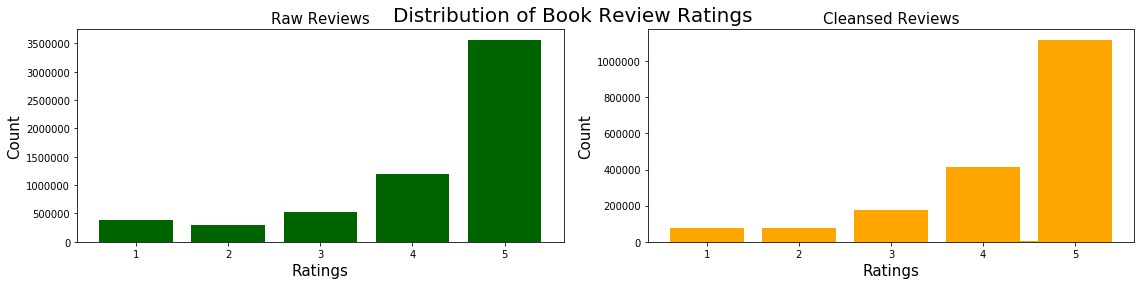

In [48]:
#derive out rating counts
big_count = df_re.groupby('overall').overall.count()
small_count = df_reT.groupby('overall').overall.count()

#plot distribution chart
fig0, axs = plt.subplots(ncols=2,figsize=(16,4))

axs[0].bar(big_count.index,big_count.values, color=['darkgreen'])
axs[0].set_title('Raw Reviews',fontsize=15)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].set_xlabel('Ratings', fontsize=15)

axs[1].bar(small_count.index,small_count.values, color=['orange'])
axs[1].set_title('Cleansed Reviews',fontsize=15)
axs[1].set_ylabel('Count',fontsize=15)
axs[1].set_xlabel('Ratings', fontsize=15)

fig0.suptitle('Distribution of Book Review Ratings',fontsize=20)
fig0.tight_layout()
plt.show()

The distribution of overall ratings is heavily skewed. Sheer number of 5-star review looks to be higher than the sum of all remaining four star ratings. <br> Also, the before and after trimming seemed to carry over the overall distribution. <br> 

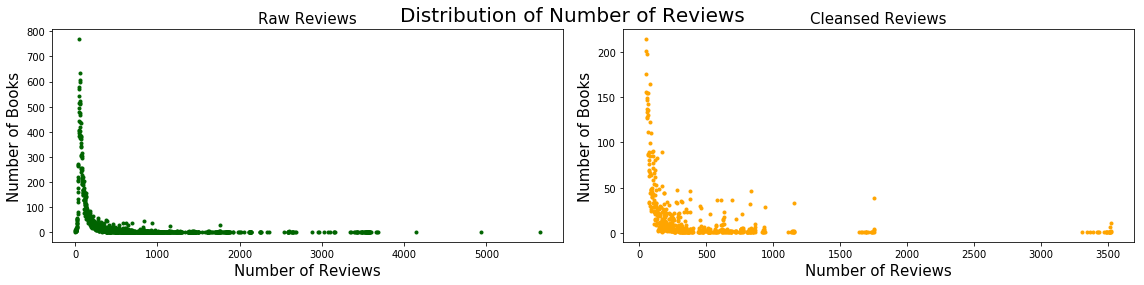

In [47]:
#group dataframe by asin and aggregate for count
small_asin = df_reT.groupby('asin').asin.count().sort_values(ascending=False)
big_asin = df_re.groupby('asin').asin.count().sort_values(ascending=False)

#to find the distribution of number of reviews, do groupby on the grouped series
ba_c= big_asin.groupby(big_asin).count()
sa_c = small_asin.groupby(small_asin).count()


fig2, axs = plt.subplots(ncols=2,figsize=(16,4))
fig2.suptitle('Distribution of Number of Reviews',fontsize=20)

axs[0].plot(ba_c.index,ba_c.values,marker='.',linestyle='',color='darkgreen')
axs[0].set_title('Raw Reviews',fontsize=15)
axs[0].set_xlabel('Number of Reviews', fontsize=15)
axs[0].set_ylabel('Number of Books', fontsize=15)

axs[1].plot(sa_c.index,sa_c.values,marker='.',linestyle='',color='orange')
axs[1].set_title('Cleansed Reviews',fontsize=15)
axs[1].set_xlabel('Number of Reviews', fontsize=15)
axs[1].set_ylabel('Number of Books', fontsize=15)

fig2.tight_layout()
plt.show()

Compared to the original dataset, we have chosen to remove low number of reviews. <br> Due to this fact, we do not see the initial spike up to 800 books anymore. <br> Moreoever, due to our method of removing lesser reviewers and duplicates have created some unusual spikes. 

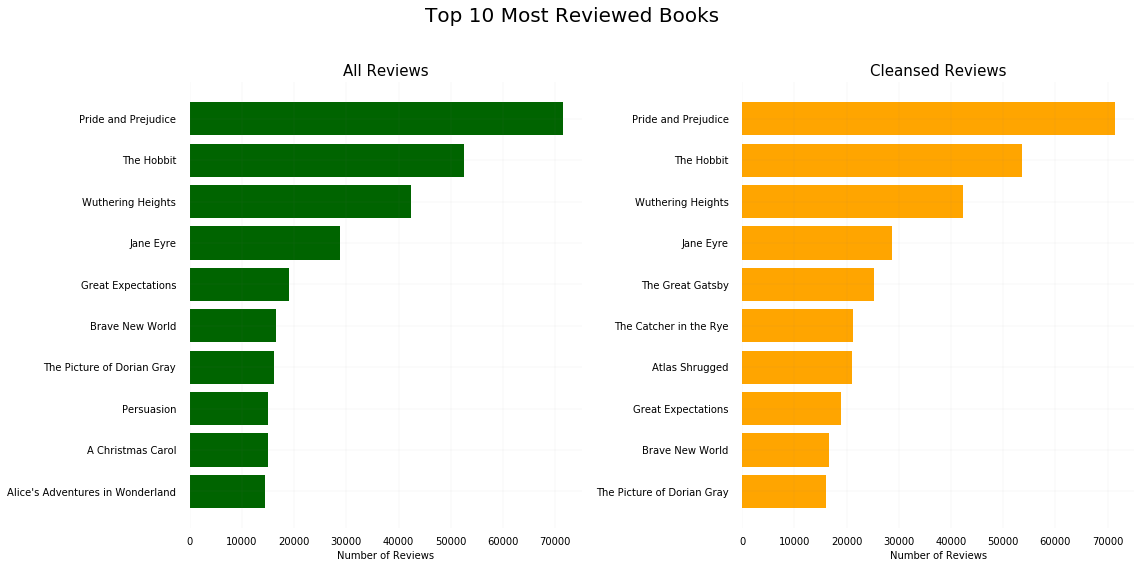

In [49]:
#group dataframe by title and aggregate for count
small_title = df_reT.groupby('title').title.count().sort_values(ascending=False)
big_title = df_re.groupby('title').title.count().sort_values(ascending=False)

#derive top ten
s_ten = small_title[:10]
b_ten = big_title[:10]

#create y position for both lists. 
#only using top ten from bigger dataframe as this will also cover for smaller data and makes it easier to compare
y_pos = np.arange(len(b_ten))


#create horizontal bar chart
fig3, axs = plt.subplots(ncols=2,figsize=(16,8))
fig3.suptitle('Top 10 Most Reviewed Books',fontsize=20)
axs[0].barh(y_pos, s_ten.values,color='darkgreen')
axs[0].set_title('All Reviews',fontsize=15)
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(s_ten.index,fontsize=10)
axs[0].set_xlabel('Number of Reviews',fontsize=10)
axs[0].invert_yaxis()  # labels read top-to-bottom

axs[1].barh(y_pos, b_ten.values,color='orange')
axs[1].set_title('Cleansed Reviews',fontsize=15)
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(b_ten.index,fontsize=10)
axs[1].set_xlabel('Number of Reviews',fontsize=10)
axs[1].invert_yaxis()  # labels read top-to-bottom


#making chart look pretty
for i in [0,1]:
    
    #remove border spines
    for s in ['left','bottom','right','top']:
        axs[i].spines[s].set_visible(False)
    
    #remove x,y ticks
    axs[i].xaxis.set_ticks_position('none')
    axs[i].yaxis.set_ticks_position('none')
    
    #add padding between axes and labels
    axs[i].xaxis.set_tick_params(pad=5)
    axs[i].yaxis.set_tick_params(pad=10)
    
    #add x,y gridlines
    axs[i].grid(b=True, color='grey', linestyle='-',linewidth=0.3, alpha = 0.2)

#rect parameter [left, bottom, right, top] adjust to fit suptitle
fig3.tight_layout(rect=[0,0,1,0.9])
plt.show()

Interestingly, even with all the data trimming, the top 10 books with most reviews have not changed a lot as well as the number of actual reviews. <br>This means our cleansed dataset is maintaining the data characteristics from the total dataset. 

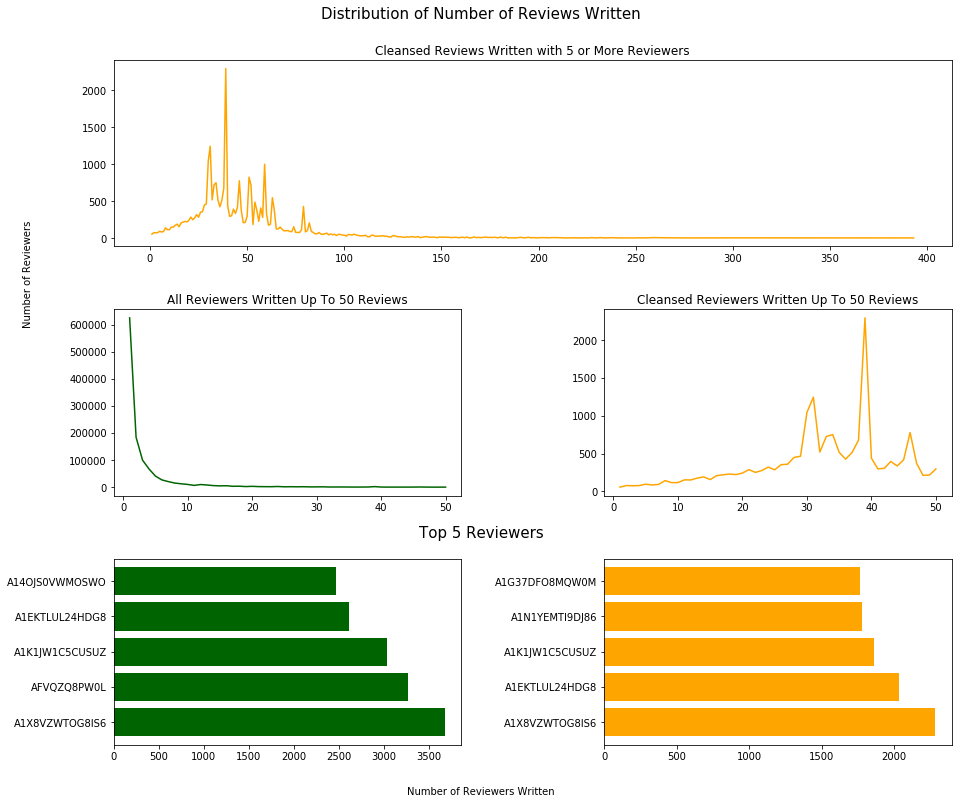

In [169]:
#isolate reviewer id counts
big_rid = df_re.groupby('reviewerID').reviewerID.count().sort_values(ascending=False)
small_rid = df_reT.groupby('reviewerID').reviewerID.count().sort_values(ascending=False)

#derive distribution of reviews per reviewer
br_c = big_rid.groupby(big_rid).count()
sr_c = small_rid.groupby(small_rid).count()

#create figure
fig4 = plt.figure(figsize=(14,12))

#different subplot dimensions so gridspec
gs = GridSpec(3,2,figure=fig4)

#plot charts
ax1 = fig4.add_subplot(gs[0,:])
ax1.plot(sr_c[sr_c.values>5], color='orange')
ax1.set_title('Cleansed Reviews Written with 5 or More Reviewers')

ax2 = fig4.add_subplot(gs[1,0])
ax2.plot(br_c[:50],color='darkgreen')
ax2.set_title('All Reviewers Written Up To 50 Reviews')

ax3 = fig4.add_subplot(gs[1,1])
ax3.plot(sr_c[:50],color='orange')
ax3.set_title('Cleansed Reviewers Written Up To 50 Reviews')

ax4 = fig4.add_subplot(gs[2,0])
ax4.barh(np.arange(5),big_rid[:5],color='darkgreen')
ax4.set_yticks(np.arange(5))#set y ticks and labels
ax4.set_yticklabels(big_rid[:5].index,fontsize=10)

ax5 = fig4.add_subplot(gs[2,1])
ax5.barh(np.arange(5),small_rid[:5],color='orange')
ax5.set_yticks(np.arange(5))
ax5.set_yticklabels(small_rid[:5].index,fontsize=10)

#texts for shared names and labels
fig4.text(0.5, 0.9, 'Distribution of Number of Reviews Written', va='center', ha='center', fontsize=15)
fig4.text(0.5, 0.3, 'Top 5 Reviewers', va='center', ha='center', fontsize=15)
fig4.text(0.5, 0, 'Number of Reviewers Written', va='center', ha='center', fontsize=10)
fig4.text(0.05, 0.6, 'Number of Reviewers', rotation='vertical',va='center', ha='center', fontsize=10)

#padding added 
fig4.tight_layout(rect=[0,0,1,0.9],pad=3)
plt.show()

Top most plot shows the distribution of number of reviews written after low count data trimming. <br> Although we set the low count to 30, we can see there are still reviewers with less than 50 reviews as noted in the plot below. <br> This is due to our additional ASIN trimming after trimming the number of reviewers down. <br> This decision was made as it is acceptable to have reviewers written less than 30 reviews but each products must have at least 50 reviews.

Second-row's left plot shows the distribution for all reviewers written up to 50 reviews.   <br> Important thing to note from this plot is how many reviews has been written by users who have never reviewed or only reviewed a few products as the steeply decreasing tail represents. <br>The left-tail eventually trickles down to 1 (at max, 1 reviewer wrote 3680 reviews).

Final row shows the top 5 reviewers from both all reviewers and cleansed reviewers. <br> We can see that for the most part the ranking did not change meaning our cleansed dataset holds a good representation of population data.